# Phase 4

# Unsupervised ML (Clustering)

# 4.1  "Create 3 clusters as below.

# 1. Sensitive Area's

# 2. Moderate Area's

# 3. Peaceful Area's"

**I have made a new excel file and named it as clusters and whichever columns i find it as good for my analysis so called quality data i have inserted in it.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_excel('CLUSTER.xlsx')
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,9,41,198,199,78,104,30,1131,16,149,175,181
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,8,16,191,366,168,65,69,1543,7,118,154,270
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,4,14,237,723,156,209,38,2088,14,112,186,404
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,1,4,98,173,164,37,23,795,17,126,57,233
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,4,25,437,1021,70,220,41,1244,12,109,247,431


In [3]:
#checking shape
data.shape

(8597, 18)

In [4]:
#checking for null values
data.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
RAPE                                                   0
KIDNAPPING & ABDUCTION                                 0
DACOITY                                                0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
RIOTS                                                  0
CHEATING                                               0
ARSON                                                  0
HURT/GREVIOUS HURT                                     0
DOWRY DEATHS                                           0
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY    0
CRUELTY BY HUSBAND OR HIS RELATIVES                    0
CAUSING DEATH BY NEGLIGENCE    

In [5]:
#checking type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8597 non-null   object
 1   DISTRICT                                             8597 non-null   object
 2   YEAR                                                 8597 non-null   int64 
 3   MURDER                                               8597 non-null   int64 
 4   RAPE                                                 8597 non-null   int64 
 5   KIDNAPPING & ABDUCTION                               8597 non-null   int64 
 6   DACOITY                                              8597 non-null   int64 
 7   ROBBERY                                              8597 non-null   int64 
 8   BURGLARY                                             8597 non-null   int64 
 9

In [6]:
#checking for duplicates
data.duplicated().sum()

0

In [7]:
#checking for the names of columns
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE'],
      dtype='object')

In [8]:
#making a list of features which i want in variable x
x=data[['MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE']]

In [9]:
x.head()

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,101,50,46,9,41,198,199,78,104,30,1131,16,149,175,181
1,151,23,53,8,16,191,366,168,65,69,1543,7,118,154,270
2,101,27,59,4,14,237,723,156,209,38,2088,14,112,186,404
3,80,20,25,1,4,98,173,164,37,23,795,17,126,57,233
4,82,23,49,4,25,437,1021,70,220,41,1244,12,109,247,431


In [10]:
#imporitng required libraires
from sklearn.cluster import KMeans

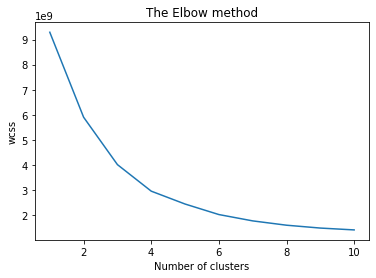

In [11]:
#checking with elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
#fitting k means to the dataset
kmeans=KMeans(n_clusters=3,random_state=70)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 ... 1 1 1]


In [13]:
#imporitng required libraires
from sklearn.metrics import silhouette_score

In [14]:
#checking silhouette score
silhouette_score(x,y_kmeans)

0.5743344407086154

In [15]:
#keeping same cluster states,districs in sepearte database
cluster_0=data[y_kmeans==0]
cluster_0

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,9,41,198,199,78,104,30,1131,16,149,175,181
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,8,16,191,366,168,65,69,1543,7,118,154,270
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,4,14,237,723,156,209,38,2088,14,112,186,404
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,4,25,437,1021,70,220,41,1244,12,109,247,431
6,ANDHRA PRADESH,GUNTUR,2001,182,54,82,16,59,338,1122,244,300,43,1792,7,139,378,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,DELHI UT,NORTH-WEST,2012,60,64,357,6,65,166,1901,0,168,3,166,12,19,212,9
8588,DELHI UT,OUTER,2012,96,67,572,6,91,262,2215,7,233,6,224,15,79,244,90
8589,DELHI UT,SOUTH,2012,39,70,245,2,52,235,2126,3,256,4,101,17,59,68,25
8590,DELHI UT,SOUTH-EAST,2012,46,116,538,2,72,201,2892,12,207,11,252,11,160,123,218


In [16]:
#keeping same cluster states,districs in sepearte database
cluster_1=data[y_kmeans==1]
cluster_1

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,1,4,98,173,164,37,23,795,17,126,57,233
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,0,0,5,2,0,162,1,0,0,1,0,1,0,4
12,ANDHRA PRADESH,MAHABOOBNAGAR,2001,157,59,42,8,27,249,316,157,84,0,867,14,176,69,280
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,10,2,296,1,4,0,17,1,0,0,6
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,8,12,1,4,118,231,70,53,34,679,6,38,108,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH-WEST,2012,47,87,399,0,47,211,1171,6,189,6,131,18,69,207,4
8592,DELHI UT,STF,2012,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,3,7,10,0,3,3,0,1,1,0
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,0,3,21,81,17,15,1,186,0,2,1,44


In [17]:
#keeping same cluster states,districs in sepearte database
cluster_2=data[y_kmeans==2]
cluster_2

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
244,KARNATAKA,BANGALORE COMMR.,2001,221,40,152,31,284,2108,6293,298,1708,3,3735,40,223,229,38
356,MAHARASHTRA,MUMBAI,2001,295,127,148,61,406,2863,11564,196,1270,6,3845,18,274,198,709
688,ANDHRA PRADESH,HYDERABAD CITY,2002,117,57,115,11,68,1348,3777,128,1734,8,3714,24,138,590,440
926,KARNATAKA,BANGALORE COMMR.,2002,201,32,159,27,365,2084,7081,284,1788,1,4029,33,237,242,45
1038,MAHARASHTRA,MUMBAI,2002,252,128,119,33,291,2597,10166,143,1155,5,3542,18,254,214,753
1373,ANDHRA PRADESH,HYDERABAD CITY,2003,124,57,155,18,91,1875,6574,231,2093,68,4595,42,165,1082,489
1502,GUJARAT,AHMEDABAD COMMR.,2003,90,18,157,31,365,959,5377,212,394,10,1371,3,50,595,173
1614,KARNATAKA,BANGALORE COMMR.,2003,216,34,132,46,311,1713,7123,273,1780,0,3847,34,213,213,84
1732,MAHARASHTRA,MUMBAI,2003,242,133,150,30,239,2550,9793,131,1178,7,3562,8,282,199,632
2066,ANDHRA PRADESH,HYDERABAD CITY,2004,121,56,136,11,71,1359,5735,141,2160,37,4837,29,144,1142,482


# Checking mean of cluster of each dataset for MURDER

In [18]:
#checking mean of cluster_0 dataset
murder_0=cluster_0['MURDER'].mean()
murder_0

79.360625

In [19]:
#checking mean of cluster_1 dataset
murder_1=cluster_1['MURDER'].mean()
murder_1

38.381425485961124

In [20]:
#checking mean of cluster_2 dataset
murder_2=cluster_2['MURDER'].mean()
murder_2

173.21153846153845

# Checking mean of cluster of each dataset for RAPE

In [21]:
#checking mean of cluster_0 dataset
rape_0=cluster_0['RAPE'].mean()
rape_0

51.31625

In [22]:
#checking mean of cluster_1 dataset
rape_1=cluster_1['RAPE'].mean()
rape_1

21.945716342692585

In [23]:
#checking mean of cluster_2 dataset
rape_2=cluster_2['RAPE'].mean()
rape_2

88.8076923076923

# Checking mean of cluster of each dataset for BURGLARY

In [24]:
#checking mean of cluster_0 dataset
burglary_0=cluster_0['BURGLARY'].mean()
burglary_0

301.286875

In [25]:
#checking mean of cluster_1 dataset
burglary_1=cluster_1['BURGLARY'].mean()
burglary_1

79.42433405327574

In [26]:
#checking mean of cluster_2 dataset
burglary_2=cluster_2['BURGLARY'].mean()
burglary_2

1609.1923076923076

# Checking mean of cluster of each dataset for HURT/GREVIOUS HURT

In [27]:
#checking mean of cluster_0 dataset
hurt_0=cluster_0['HURT/GREVIOUS HURT'].mean()
hurt_0

1114.525

In [28]:
#checking mean of cluster_1 dataset
hurt_1=cluster_1['HURT/GREVIOUS HURT'].mean()
hurt_1

205.5445644348452

In [29]:
#checking mean of cluster_2 dataset
hurt_2=cluster_2['HURT/GREVIOUS HURT'].mean()
hurt_2

3098.6346153846152

# Checking mean of cluster of each dataset for THEFT

In [30]:
#checking mean of cluster_0 dataset
theft_0=cluster_0['THEFT'].mean()
theft_0

1001.110625

In [31]:
#checking mean of cluster_1 dataset
theft_1=cluster_1['THEFT'].mean()
theft_1

218.0774658027358

In [32]:
#checking mean of cluster_2 dataset
theft_2=cluster_2['THEFT'].mean()
theft_2

7388.557692307692

# Checking mean of cluster of each dataset for CHEATING

In [33]:
#checking mean of cluster_0 dataset
cheating_0=cluster_0['CHEATING'].mean()
cheating_0

209.17625

In [34]:
#checking mean of cluster_1 dataset
cheating_1=cluster_1['CHEATING'].mean()
cheating_1

50.88149748020158

In [35]:
#checking mean of cluster_2 dataset
cheating_2=cluster_2['CHEATING'].mean()
cheating_2

1529.673076923077

**OBSERVATION**
* **I have find out mean of some columns such as Murder, rape, Burglary, Theft, Cheating and Hurt.**
* **By looking at the mean of the each dataset clusters we can see that cluster_2 have highest mean, followed by cluster_0 and       least is the cluster_1.**
* **So by looking at the mean we can say that cluster which mean is higher has the highest number of crimes and because of that     its means is coming highest among theree of the clusters.And the cluster which has least mean will have the lowest number of     crimes.And in between will fall the cluster which mean is not low or high.**
* **So by this we can say that cluster__2 is sensitive area as it has the highest mean among the three clusters.**
* **For cluster_0 we can say that it belongs to moderate area as its mean falls in between cluster_2  and cluster_1.**
* **And for cluster_1 we can say that it belongs to Peaceful area as it has the least mean compared to the other clusters mean.**
* **To cross verify i will plot some lineplots.**

# Plotting Line plots

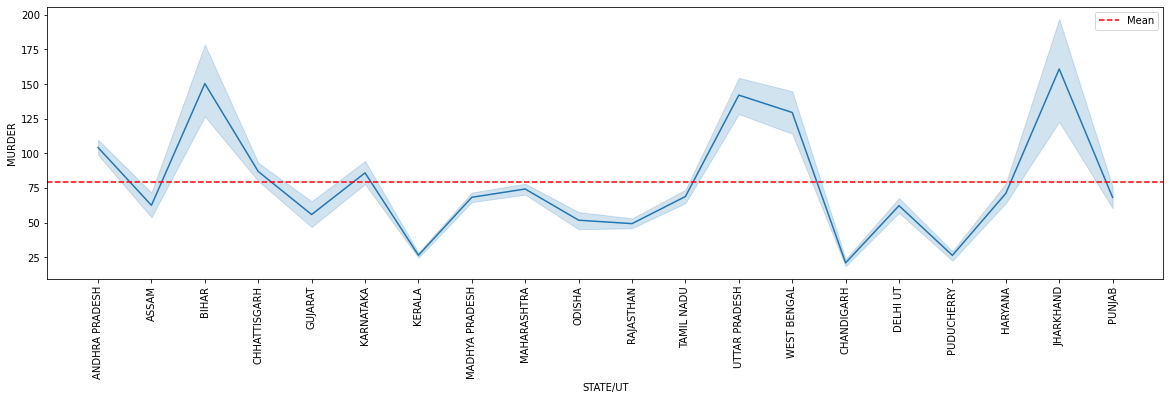

In [91]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='MURDER',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(murder_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

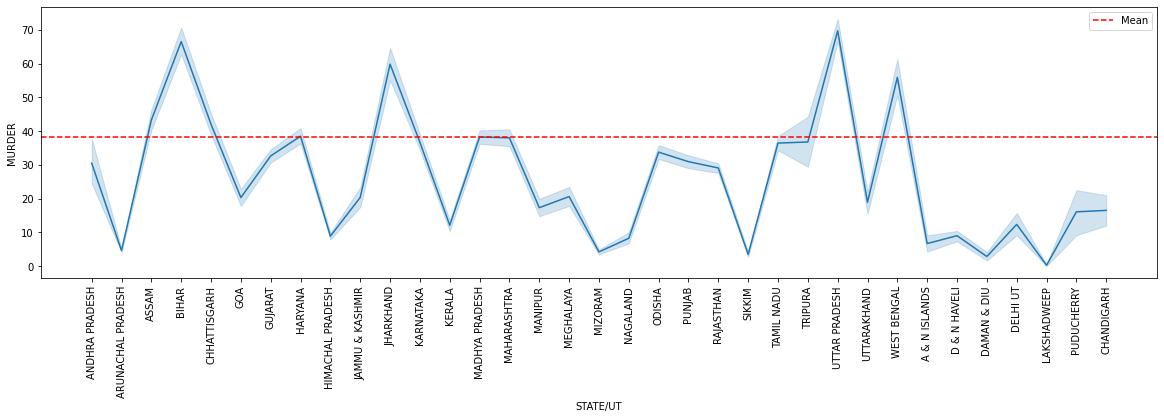

In [92]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='MURDER',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(murder_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

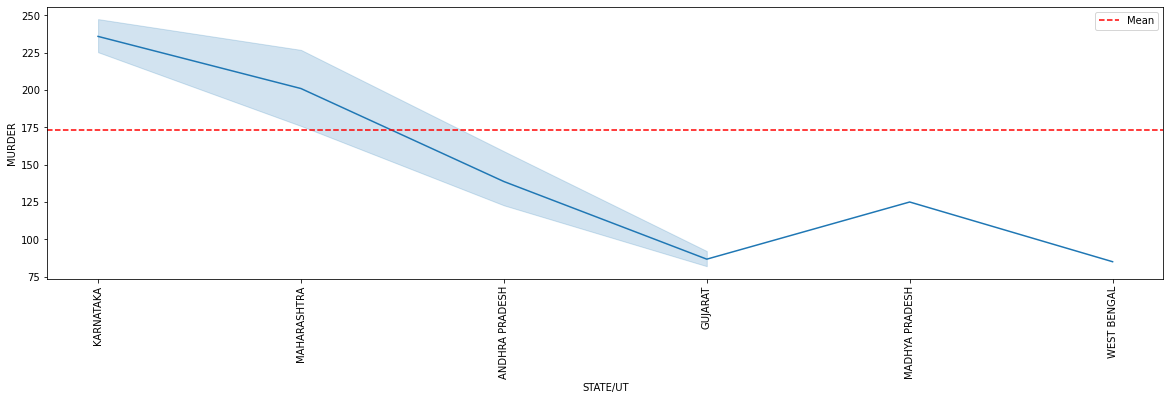

In [93]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='MURDER',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(murder_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

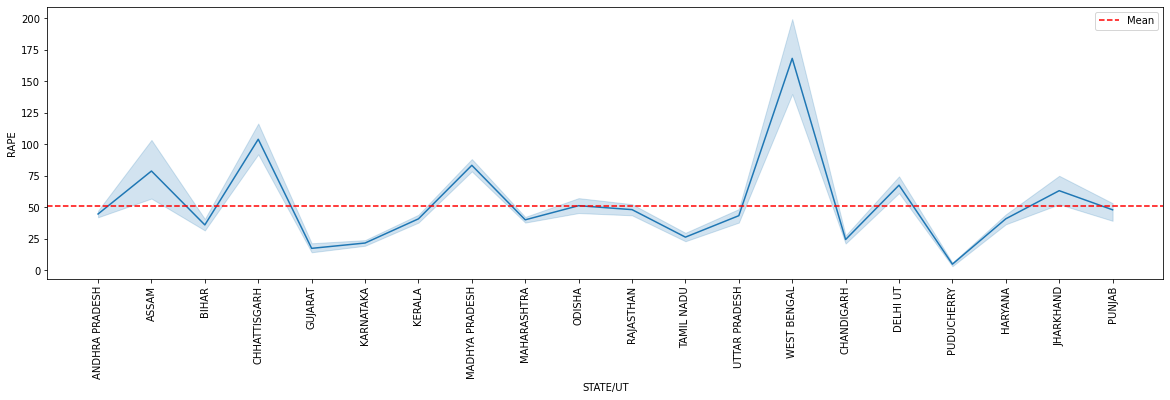

In [94]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='RAPE',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(rape_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

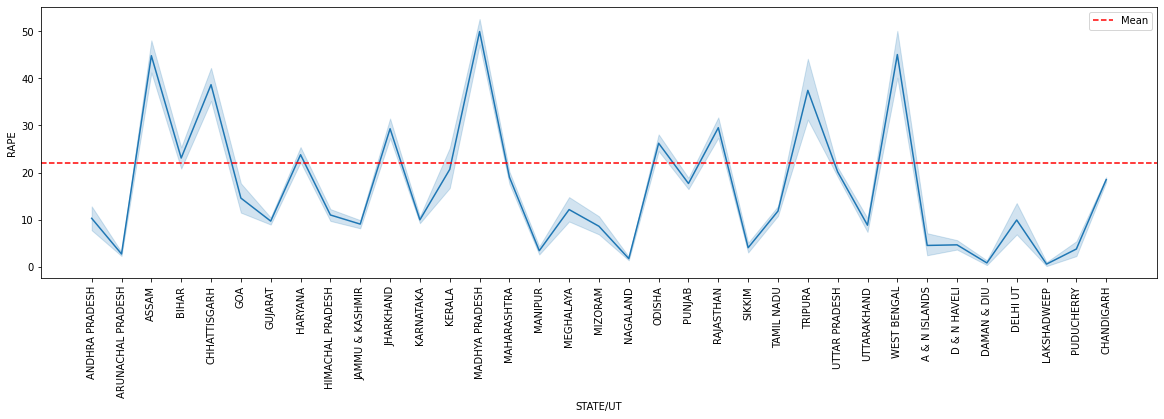

In [100]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='RAPE',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(rape_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

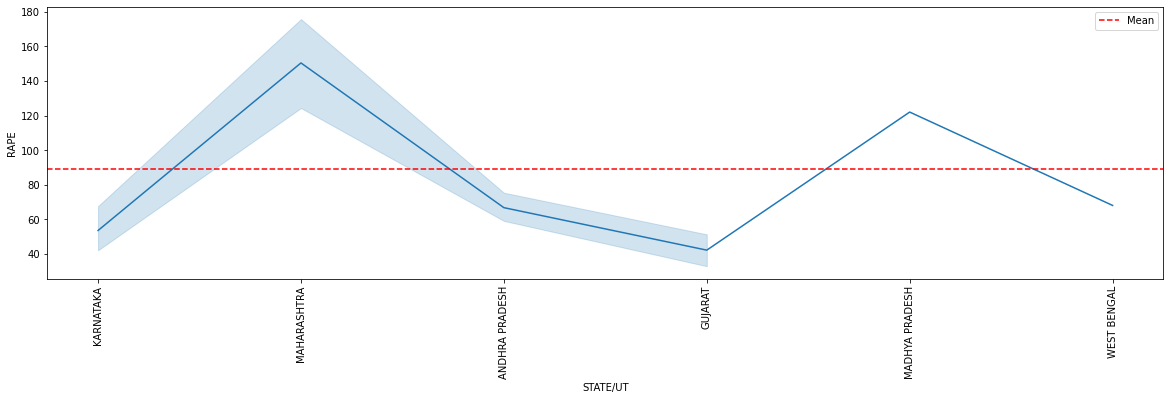

In [101]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='RAPE',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(rape_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

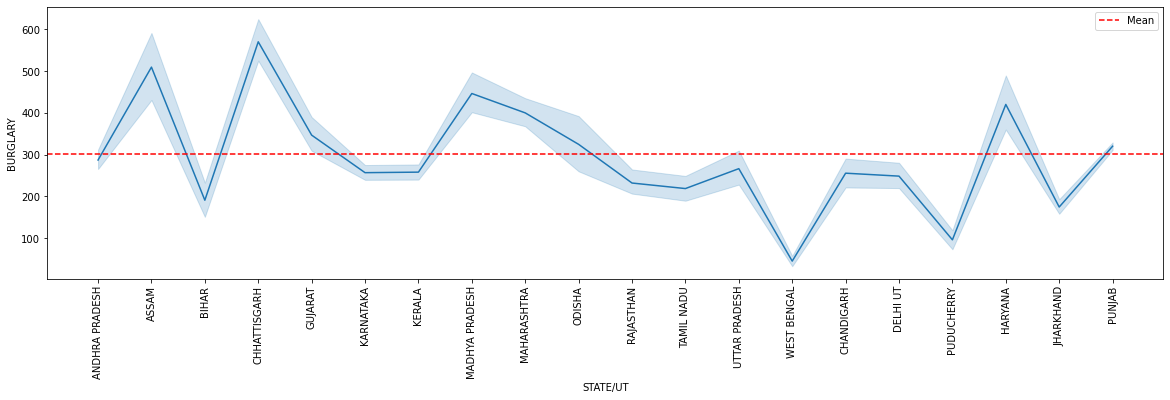

In [102]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='BURGLARY',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(burglary_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

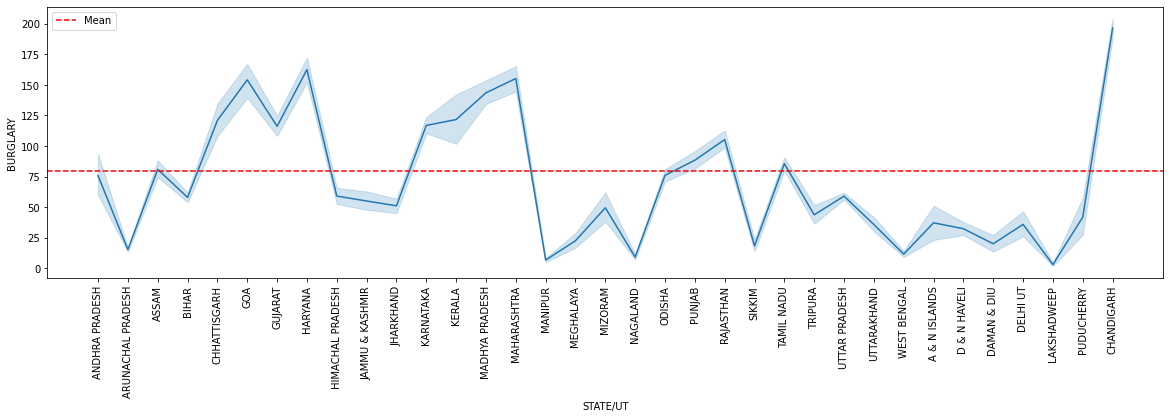

In [103]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='BURGLARY',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(burglary_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

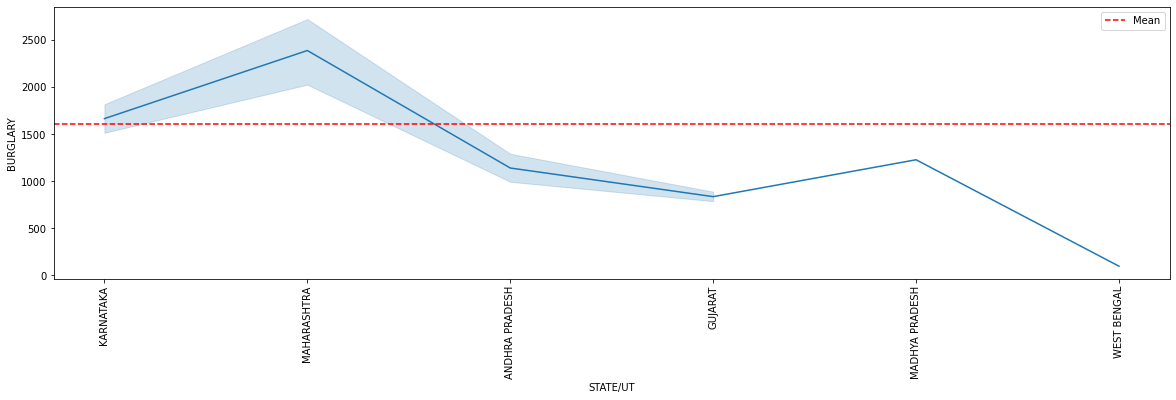

In [104]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='BURGLARY',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(burglary_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

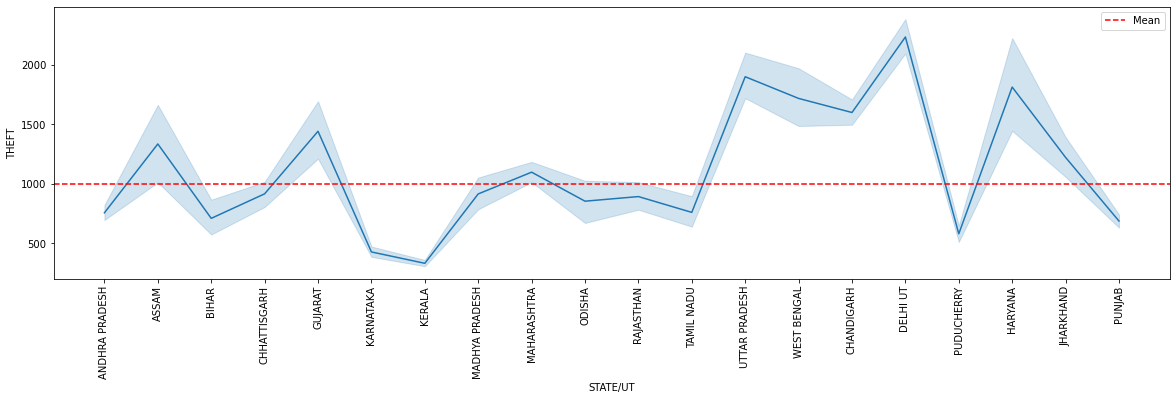

In [114]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='THEFT',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(theft_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

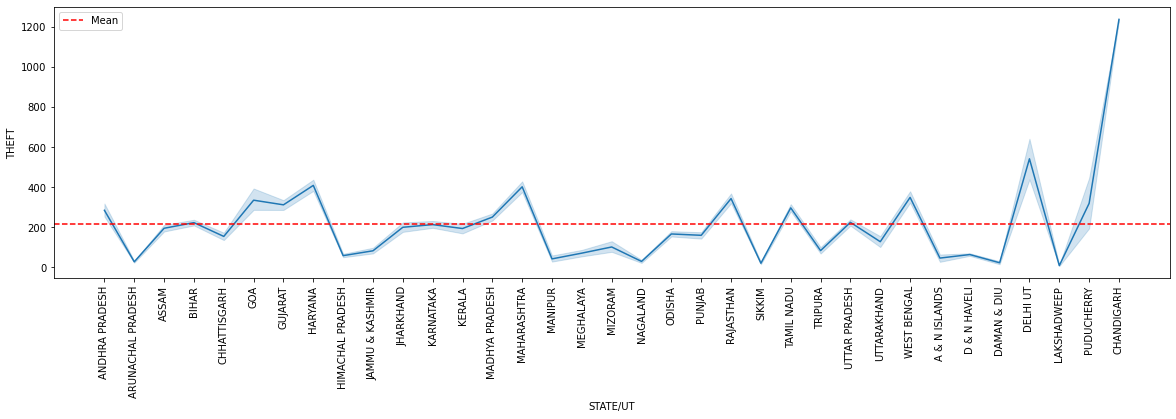

In [115]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='THEFT',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(theft_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

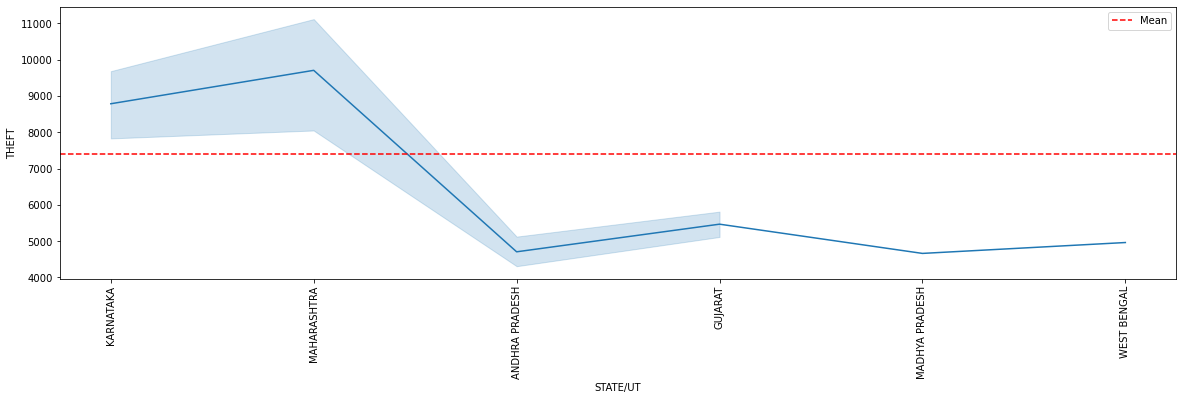

In [116]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='THEFT',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(theft_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

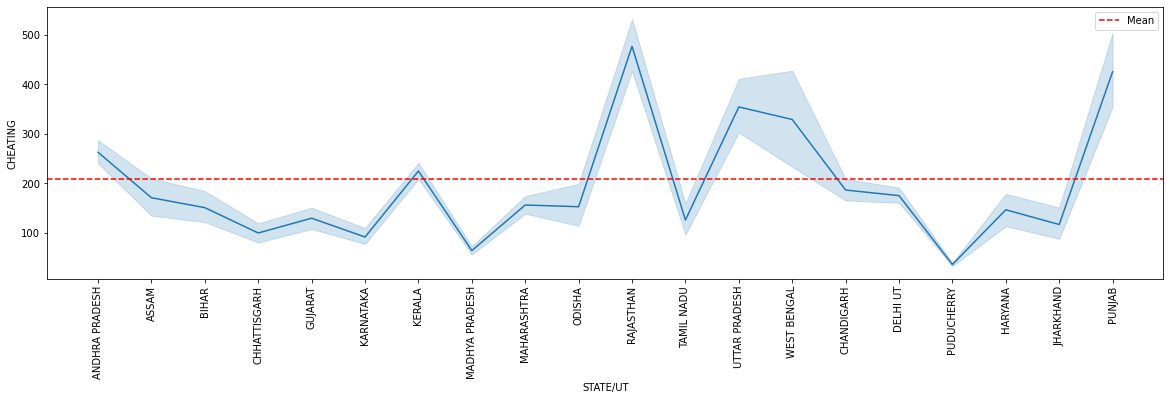

In [117]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='CHEATING',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(cheating_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

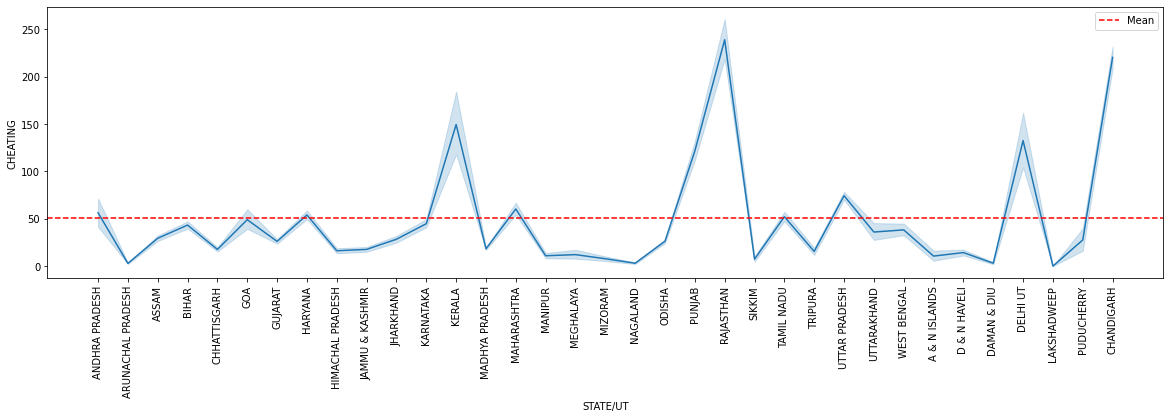

In [118]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='CHEATING',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(cheating_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

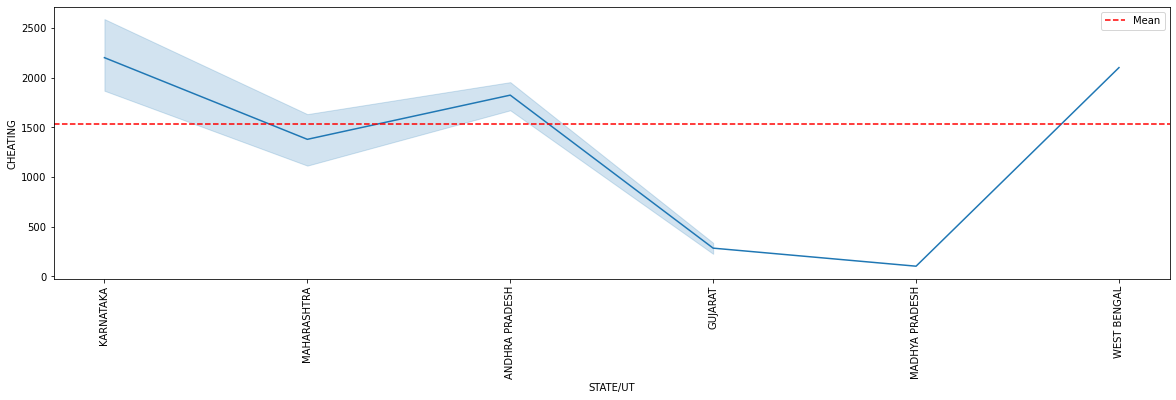

In [119]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='CHEATING',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(cheating_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

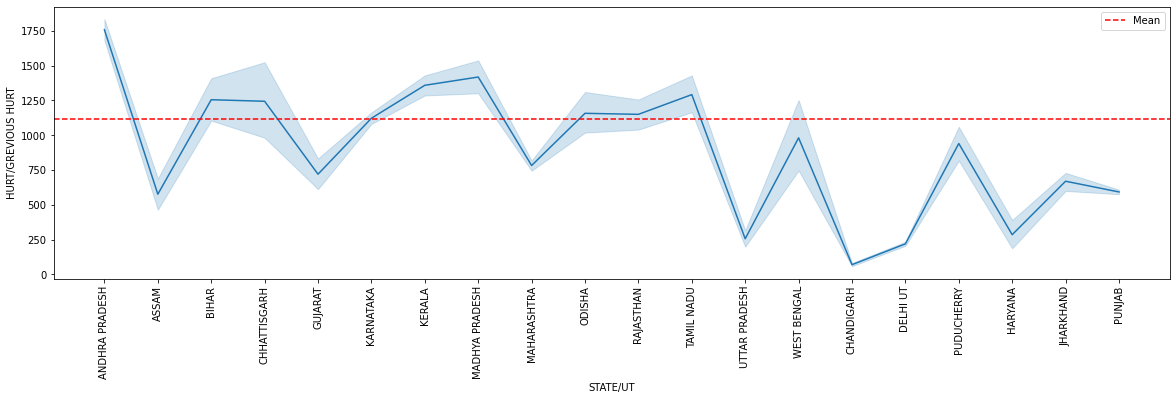

In [120]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='HURT/GREVIOUS HURT',data=cluster_0)
plt.xticks(rotation='vertical')
plt.axhline(hurt_0,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

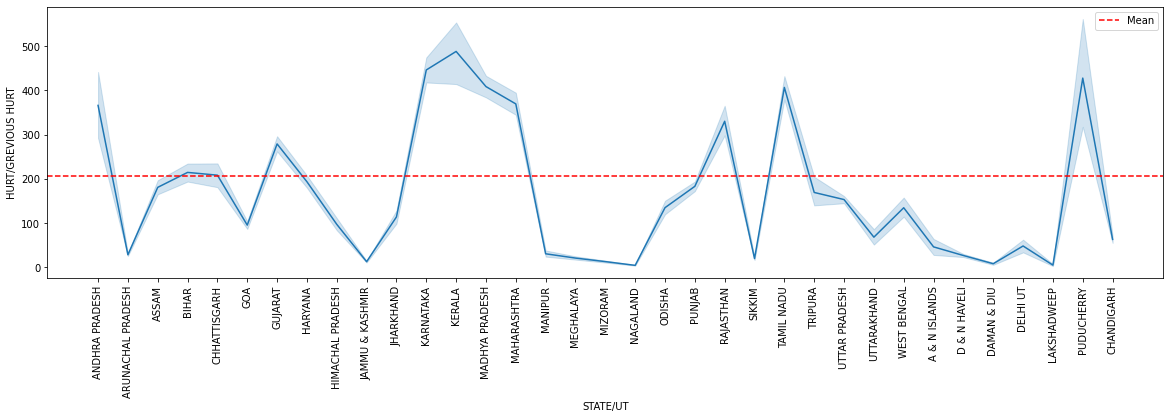

In [121]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='HURT/GREVIOUS HURT',data=cluster_1)
plt.xticks(rotation='vertical')
plt.axhline(hurt_1,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

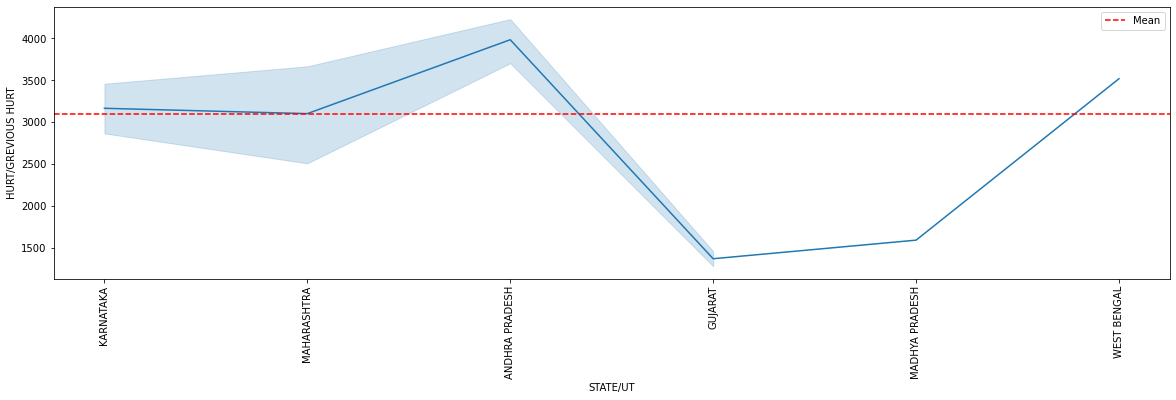

In [122]:
#plotting line plot
plt.figure(figsize=(20,5))
sns.lineplot(x='STATE/UT',y='HURT/GREVIOUS HURT',data=cluster_2)
plt.xticks(rotation='vertical')
plt.axhline(hurt_2,color='r',linestyle='--',label='Mean')
plt.legend()
plt.show()

**OBSERVATION**
* **By looking at the above lineplots and its means we can see that cluster_0 falls under Moderate area, cluster_1 falls under Peaceful area and cluster_2 falls under Sensitive area.**

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

**As cluster_0 falls under Moderate area and i have already created the dataframe before and had named it as cluster_0. So now i am changing the name of it as modearte area and transferring the data to it.**

In [36]:
#Transferring and changing the name to Moderate area
moderate_area=cluster_0
moderate_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,9,41,198,199,78,104,30,1131,16,149,175,181
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,8,16,191,366,168,65,69,1543,7,118,154,270
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,4,14,237,723,156,209,38,2088,14,112,186,404
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,4,25,437,1021,70,220,41,1244,12,109,247,431
6,ANDHRA PRADESH,GUNTUR,2001,182,54,82,16,59,338,1122,244,300,43,1792,7,139,378,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,DELHI UT,NORTH-WEST,2012,60,64,357,6,65,166,1901,0,168,3,166,12,19,212,9
8588,DELHI UT,OUTER,2012,96,67,572,6,91,262,2215,7,233,6,224,15,79,244,90
8589,DELHI UT,SOUTH,2012,39,70,245,2,52,235,2126,3,256,4,101,17,59,68,25
8590,DELHI UT,SOUTH-EAST,2012,46,116,538,2,72,201,2892,12,207,11,252,11,160,123,218


In [37]:
#Transferring and changing the name to Peaceful area
peaceful_area=cluster_1
peaceful_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,1,4,98,173,164,37,23,795,17,126,57,233
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,0,0,5,2,0,162,1,0,0,1,0,1,0,4
12,ANDHRA PRADESH,MAHABOOBNAGAR,2001,157,59,42,8,27,249,316,157,84,0,867,14,176,69,280
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,10,2,296,1,4,0,17,1,0,0,6
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,8,12,1,4,118,231,70,53,34,679,6,38,108,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH-WEST,2012,47,87,399,0,47,211,1171,6,189,6,131,18,69,207,4
8592,DELHI UT,STF,2012,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,3,7,10,0,3,3,0,1,1,0
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,0,3,21,81,17,15,1,186,0,2,1,44


In [38]:
#Transferring and changing the name to Sensitive area
sensitive_area=cluster_2
sensitive_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
244,KARNATAKA,BANGALORE COMMR.,2001,221,40,152,31,284,2108,6293,298,1708,3,3735,40,223,229,38
356,MAHARASHTRA,MUMBAI,2001,295,127,148,61,406,2863,11564,196,1270,6,3845,18,274,198,709
688,ANDHRA PRADESH,HYDERABAD CITY,2002,117,57,115,11,68,1348,3777,128,1734,8,3714,24,138,590,440
926,KARNATAKA,BANGALORE COMMR.,2002,201,32,159,27,365,2084,7081,284,1788,1,4029,33,237,242,45
1038,MAHARASHTRA,MUMBAI,2002,252,128,119,33,291,2597,10166,143,1155,5,3542,18,254,214,753
1373,ANDHRA PRADESH,HYDERABAD CITY,2003,124,57,155,18,91,1875,6574,231,2093,68,4595,42,165,1082,489
1502,GUJARAT,AHMEDABAD COMMR.,2003,90,18,157,31,365,959,5377,212,394,10,1371,3,50,595,173
1614,KARNATAKA,BANGALORE COMMR.,2003,216,34,132,46,311,1713,7123,273,1780,0,3847,34,213,213,84
1732,MAHARASHTRA,MUMBAI,2003,242,133,150,30,239,2550,9793,131,1178,7,3562,8,282,199,632
2066,ANDHRA PRADESH,HYDERABAD CITY,2004,121,56,136,11,71,1359,5735,141,2160,37,4837,29,144,1142,482


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

# Checking for the states and districs with most number of  Murders, Rapes and kidnapping and abduction in sensitive area

In [52]:
#Checking for most murders
most_murder=sensitive_area.sort_values(by='MURDER',ascending=False)
most_murder[:5]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
356,MAHARASHTRA,MUMBAI,2001,295,127,148,61,406,2863,11564,196,1270,6,3845,18,274,198,709
6593,KARNATAKA,BANGALORE COMMR.,2010,266,65,513,66,641,1335,10568,349,3073,7,3153,52,308,398,104
8106,KARNATAKA,BANGALORE COMMR.,2012,266,90,532,37,670,1240,9826,551,3092,0,3095,51,321,524,170
5854,KARNATAKA,BANGALORE COMMR.,2009,256,65,270,41,743,1592,11730,337,3007,8,2653,50,251,367,87
5124,KARNATAKA,BANGALORE COMMR.,2008,253,54,159,88,702,1787,9681,348,2025,10,2497,52,179,307,126


**So from above table we can see that most number of murders took place in State Maharashtra in district Mumbai and in the year 2001.**

In [53]:
#Checking for most rapes
most_rape=sensitive_area.sort_values(by='RAPE',ascending=False)
most_rape[:5]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
8231,MAHARASHTRA,MUMBAI COMMR.,2012,215,232,212,29,1131,2500,10851,374,1827,86,3939,11,614,388,621
7465,MAHARASHTRA,MUMBAI COMMR.,2011,203,221,221,28,467,2745,12983,379,1946,46,4302,14,553,393,656
5245,MAHARASHTRA,MUMBAI COMMR.,2008,210,218,189,35,328,2846,12972,377,2025,22,4155,11,436,502,709
3124,MAHARASHTRA,MUMBAI,2005,212,201,198,47,362,3175,11903,261,1664,10,3731,9,385,336,658
6715,MAHARASHTRA,MUMBAI COMMR.,2010,228,194,194,35,410,3059,13195,391,2211,22,4487,21,475,312,690


**So from above table we can see that most number of rapes took place in State Maharashtra in district Mumbai commr and in the year 2012.**

In [56]:
#Checking for most kidnapping and abduction
most_kidnapping=sensitive_area.sort_values(by='KIDNAPPING & ABDUCTION',ascending=False)
most_kidnapping[:5]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
7340,KARNATAKA,BANGALORE COMMR.,2011,232,97,573,43,783,1313,10543,390,3155,4,2927,53,250,458,108
8106,KARNATAKA,BANGALORE COMMR.,2012,266,90,532,37,670,1240,9826,551,3092,0,3095,51,321,524,170
6593,KARNATAKA,BANGALORE COMMR.,2010,266,65,513,66,641,1335,10568,349,3073,7,3153,52,308,398,104
8559,WEST BENGAL,KOLKATA,2012,85,68,271,8,44,96,4960,397,2100,0,3518,19,486,865,507
5854,KARNATAKA,BANGALORE COMMR.,2009,256,65,270,41,743,1592,11730,337,3007,8,2653,50,251,367,87


**So from above table we can see that most number of kidnapping and abduction took place in State Karnataka in district Bangalore coomr and in the year 2011.**

In [65]:
#Adding column to sensitive area named as total crimes which gives the sum of all crimes 
sensitive_area['TOTAL_CRIMES']=sensitive_area['MURDER']+sensitive_area['RAPE']+sensitive_area['KIDNAPPING & ABDUCTION']+sensitive_area['DACOITY']+sensitive_area['ROBBERY']+sensitive_area['BURGLARY']+sensitive_area['THEFT']+sensitive_area['RIOTS']+sensitive_area['CHEATING']+sensitive_area['ARSON']+sensitive_area['HURT/GREVIOUS HURT']+sensitive_area['DOWRY DEATHS']+sensitive_area['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+sensitive_area['CRUELTY BY HUSBAND OR HIS RELATIVES']+sensitive_area['CAUSING DEATH BY NEGLIGENCE']

In [81]:
sensitive_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
244,KARNATAKA,BANGALORE COMMR.,2001,221,40,152,31,284,2108,6293,298,1708,3,3735,40,223,229,38,15403
356,MAHARASHTRA,MUMBAI,2001,295,127,148,61,406,2863,11564,196,1270,6,3845,18,274,198,709,21980
688,ANDHRA PRADESH,HYDERABAD CITY,2002,117,57,115,11,68,1348,3777,128,1734,8,3714,24,138,590,440,12269
926,KARNATAKA,BANGALORE COMMR.,2002,201,32,159,27,365,2084,7081,284,1788,1,4029,33,237,242,45,16608
1038,MAHARASHTRA,MUMBAI,2002,252,128,119,33,291,2597,10166,143,1155,5,3542,18,254,214,753,19670
1373,ANDHRA PRADESH,HYDERABAD CITY,2003,124,57,155,18,91,1875,6574,231,2093,68,4595,42,165,1082,489,17659
1502,GUJARAT,AHMEDABAD COMMR.,2003,90,18,157,31,365,959,5377,212,394,10,1371,3,50,595,173,9805
1614,KARNATAKA,BANGALORE COMMR.,2003,216,34,132,46,311,1713,7123,273,1780,0,3847,34,213,213,84,16019
1732,MAHARASHTRA,MUMBAI,2003,242,133,150,30,239,2550,9793,131,1178,7,3562,8,282,199,632,19136
2066,ANDHRA PRADESH,HYDERABAD CITY,2004,121,56,136,11,71,1359,5735,141,2160,37,4837,29,144,1142,482,16461


In [82]:
#Checking for most crimes
most_crimes=sensitive_area.sort_values(by='TOTAL_CRIMES',ascending=False)
most_crimes[:5]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
6715,MAHARASHTRA,MUMBAI COMMR.,2010,228,194,194,35,410,3059,13195,391,2211,22,4487,21,475,312,690,25924
7465,MAHARASHTRA,MUMBAI COMMR.,2011,203,221,221,28,467,2745,12983,379,1946,46,4302,14,553,393,656,25157
5245,MAHARASHTRA,MUMBAI COMMR.,2008,210,218,189,35,328,2846,12972,377,2025,22,4155,11,436,502,709,25035
5975,MAHARASHTRA,MUMBAI COMMR.,2009,217,182,149,39,316,2769,12009,305,2132,14,3892,15,400,434,710,23583
3124,MAHARASHTRA,MUMBAI,2005,212,201,198,47,362,3175,11903,261,1664,10,3731,9,385,336,658,23152


**So from above table we can see that most number of crimes took place in State Maharashtra in district Mumbai Commr & Mumbai and in the year 2010,2011,2008,2009 and 2005.So this was the most unsafe place to live in year 2010**

In [74]:
#Checking for unique value
sensitive_area['STATE/UT'].unique()

array(['KARNATAKA', 'MAHARASHTRA', 'ANDHRA PRADESH', 'GUJARAT',
       'MADHYA PRADESH', 'WEST BENGAL'], dtype=object)

**So we can see that states KARNATAKA,MAHARASHTRA, ANDHRA PRADESH GUJARAT, MADHYA PRADESH AND WEST BENGAL falls in sensitive area. It means that most number of crimes area taking place in this states.**

In [83]:
#checking data of karnataka
data_karnataka=sensitive_area[sensitive_area['STATE/UT']=='KARNATAKA']
data_karnataka

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
244,KARNATAKA,BANGALORE COMMR.,2001,221,40,152,31,284,2108,6293,298,1708,3,3735,40,223,229,38,15403
926,KARNATAKA,BANGALORE COMMR.,2002,201,32,159,27,365,2084,7081,284,1788,1,4029,33,237,242,45,16608
1614,KARNATAKA,BANGALORE COMMR.,2003,216,34,132,46,311,1713,7123,273,1780,0,3847,34,213,213,84,16019
2307,KARNATAKA,BANGALORE COMMR.,2004,214,32,175,37,455,1874,8241,323,1534,3,3542,44,151,227,104,16956
3006,KARNATAKA,BANGALORE COMMR.,2005,242,38,131,35,594,1771,9617,377,1633,5,3474,39,167,287,93,18503
3705,KARNATAKA,BANGALORE COMMR.,2006,218,33,99,37,647,1666,7354,710,1554,5,2640,50,143,290,113,15559
4412,KARNATAKA,BANGALORE COMMR.,2007,246,62,119,41,545,1485,7377,425,2052,2,2381,54,187,290,110,15376
5124,KARNATAKA,BANGALORE COMMR.,2008,253,54,159,88,702,1787,9681,348,2025,10,2497,52,179,307,126,18268
5854,KARNATAKA,BANGALORE COMMR.,2009,256,65,270,41,743,1592,11730,337,3007,8,2653,50,251,367,87,21457
6593,KARNATAKA,BANGALORE COMMR.,2010,266,65,513,66,641,1335,10568,349,3073,7,3153,52,308,398,104,20898


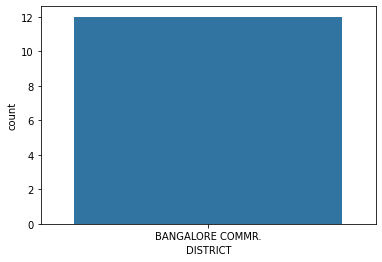

In [106]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_karnataka)
plt.show()

**By looking at the plot we can see that the same district that is Bangalore Commr is repeating for almost every year from karnataka.So by this we can say like it is the most unsafe district.**

In [99]:
#checking data of maharashra
data_maharashtra=sensitive_area[sensitive_area['STATE/UT']=='MAHARASHTRA']
data_maharashtra

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
356,MAHARASHTRA,MUMBAI,2001,295,127,148,61,406,2863,11564,196,1270,6,3845,18,274,198,709,21980
1038,MAHARASHTRA,MUMBAI,2002,252,128,119,33,291,2597,10166,143,1155,5,3542,18,254,214,753,19670
1732,MAHARASHTRA,MUMBAI,2003,242,133,150,30,239,2550,9793,131,1178,7,3562,8,282,199,632,19136
2425,MAHARASHTRA,MUMBAI,2004,253,187,178,42,302,2978,11510,213,1427,10,3702,13,321,248,735,22119
3124,MAHARASHTRA,MUMBAI,2005,212,201,198,47,362,3175,11903,261,1664,10,3731,9,385,336,658,23152
3823,MAHARASHTRA,MUMBAI COMMR.,2006,239,165,190,29,292,3111,11685,278,1701,15,3797,17,357,327,778,22981
4530,MAHARASHTRA,MUMBAI COMMR.,2007,230,174,179,31,265,2886,11670,260,1735,13,3781,17,365,380,778,22764
4542,MAHARASHTRA,PUNE COMMR.,2007,126,66,122,37,232,1369,4653,457,517,18,1274,6,79,250,537,9743
5245,MAHARASHTRA,MUMBAI COMMR.,2008,210,218,189,35,328,2846,12972,377,2025,22,4155,11,436,502,709,25035
5257,MAHARASHTRA,PUNE COMMR.,2008,137,92,110,37,379,1395,5509,530,600,21,1328,7,113,273,642,11173


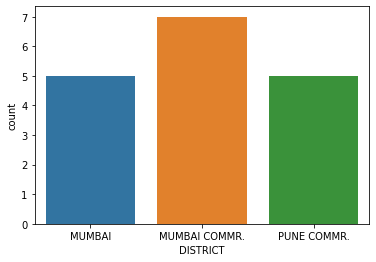

In [110]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_maharashtra)
plt.show()

**By looking at the plot we can see that three districts from maharashtra falls under sensitive area, that is Mumbai commr,mumbai and pune commr.Among this Mumbai Commr district is most repaeating one among rest two. so we can say that Mumbai Commr district is the unsafe district**

In [94]:
##checking data of Andhra Pradesh
data_andhra=sensitive_area[sensitive_area['STATE/UT']=='ANDHRA PRADESH']
data_andhra

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
688,ANDHRA PRADESH,HYDERABAD CITY,2002,117,57,115,11,68,1348,3777,128,1734,8,3714,24,138,590,440,12269
1373,ANDHRA PRADESH,HYDERABAD CITY,2003,124,57,155,18,91,1875,6574,231,2093,68,4595,42,165,1082,489,17659
2066,ANDHRA PRADESH,HYDERABAD CITY,2004,121,56,136,11,71,1359,5735,141,2160,37,4837,29,144,1142,482,16461
2760,ANDHRA PRADESH,HYDERABAD CITY,2005,108,67,137,8,125,1161,5022,96,1880,40,4227,27,119,1309,514,14840
3458,ANDHRA PRADESH,HYDERABAD CITY,2006,125,93,143,12,99,1186,4408,128,1777,26,4581,29,189,1160,582,14538
4163,ANDHRA PRADESH,HYDERABAD CITY,2007,121,58,148,6,96,993,4542,214,1669,37,4352,41,216,1365,502,14360
4871,ANDHRA PRADESH,HYDERABAD CITY,2008,122,62,140,10,115,1143,5200,143,1875,44,4244,41,231,1184,482,15036
5597,ANDHRA PRADESH,HYDERABAD CITY,2009,153,47,108,5,59,969,5091,199,2007,7,3516,36,295,1363,516,14371
6325,ANDHRA PRADESH,CYBERABAD,2010,187,95,150,14,63,1361,4015,60,1256,61,3529,43,157,1191,1080,13262
6330,ANDHRA PRADESH,HYDERABAD CITY,2010,134,45,121,7,54,906,4916,513,2021,15,3425,44,171,1420,542,14334


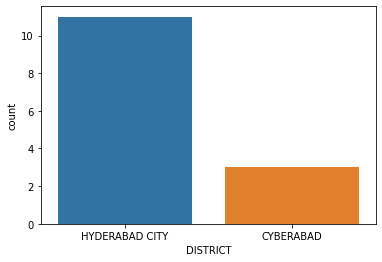

In [111]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_andhra)
plt.show()

**So by looking at the plot we can see that two district from Andhra Pradesh falls under senstive area that is Hyderabad city and Cyberabad.And it can be seen that Hyderabad city district is most repeating amongst the two.So we can say that Hyderabad city is the unsafe district.**

In [95]:
##checking data of Gujarat
data_gujarat=sensitive_area[sensitive_area['STATE/UT']=='GUJARAT']
data_gujarat

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
1502,GUJARAT,AHMEDABAD COMMR.,2003,90,18,157,31,365,959,5377,212,394,10,1371,3,50,595,173,9805
2195,GUJARAT,AHMEDABAD COMMR.,2004,92,40,215,33,271,931,5711,162,333,10,1594,10,63,768,165,10398
2893,GUJARAT,AHMEDABAD COMMR.,2005,76,35,219,23,159,825,5359,150,344,6,1361,1,54,745,188,9545
3591,GUJARAT,AHMEDABAD COMMR.,2006,99,46,182,23,172,802,5388,128,297,5,1371,4,72,956,227,9772
5004,GUJARAT,AHMEDABAD COMMR.,2008,85,44,172,14,538,778,5485,168,200,1,1335,1,78,1185,242,10326
5731,GUJARAT,AHMEDABAD COMMR.,2009,83,63,181,16,844,751,6283,178,205,6,1165,5,74,1169,205,11228
6468,GUJARAT,AHMEDABAD COMMR.,2010,82,49,207,26,805,799,4659,171,212,4,1365,12,73,1230,203,9897


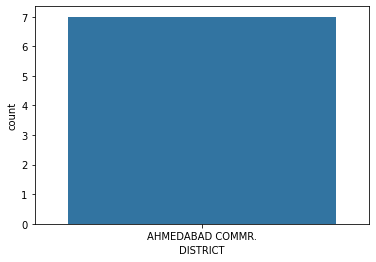

In [112]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_gujarat)
plt.show()

**So by looking at the most we can see that Ahmedabad Commr district from Gujarat falls under sensitive area and it most repeating one.So we can say that it is unsafe district.**

In [96]:
#checking data of Madhya Pradesh
data_madhya_pradesh=sensitive_area[sensitive_area['STATE/UT']=='MADHYA PRADESH']
data_madhya_pradesh

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
5195,MADHYA PRADESH,INDORE,2008,125,122,61,7,354,1227,4660,223,102,55,1588,35,343,369,426,9697


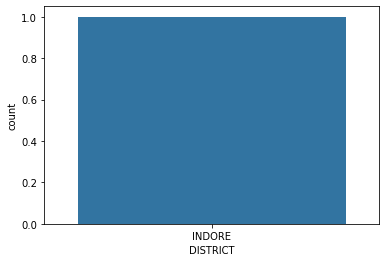

In [113]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_madhya_pradesh)
plt.show()

In [97]:
#checking data of west Bengal
data_west_bengal=sensitive_area[sensitive_area['STATE/UT']=='WEST BENGAL']
data_west_bengal

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
8559,WEST BENGAL,KOLKATA,2012,85,68,271,8,44,96,4960,397,2100,0,3518,19,486,865,507,13424


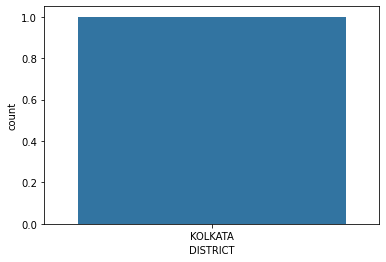

In [114]:
#plotting count plot
sns.countplot(x='DISTRICT',data=data_west_bengal)
plt.show()

# Plotting line plots for sensitive area(years vs crimes)

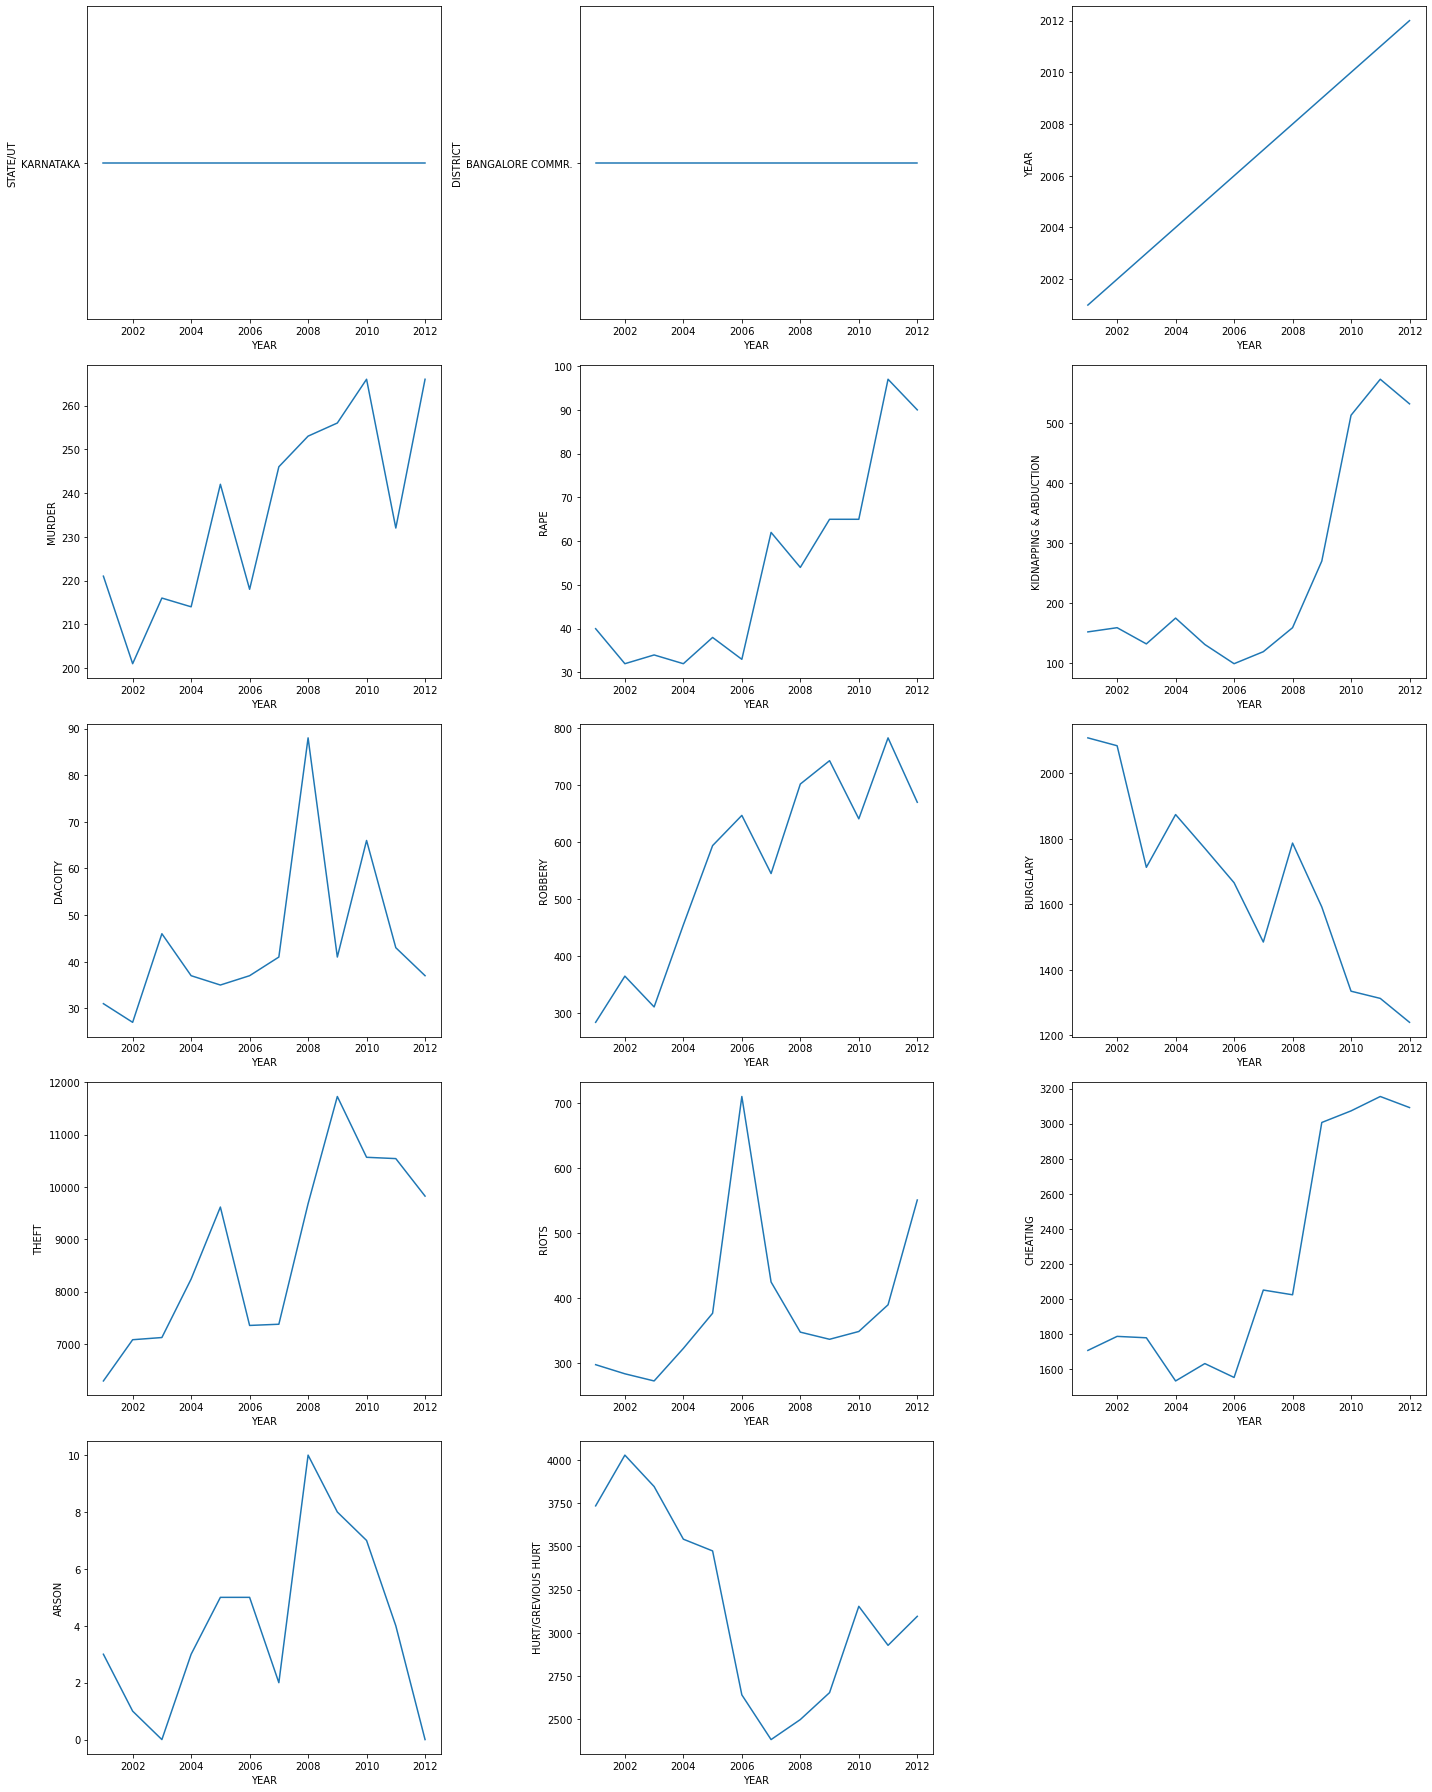

In [92]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_karnataka:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.lineplot(x='YEAR',y=data_karnataka[column],data=data_karnataka)
    plotnumber+=1
plt.tight_layout()

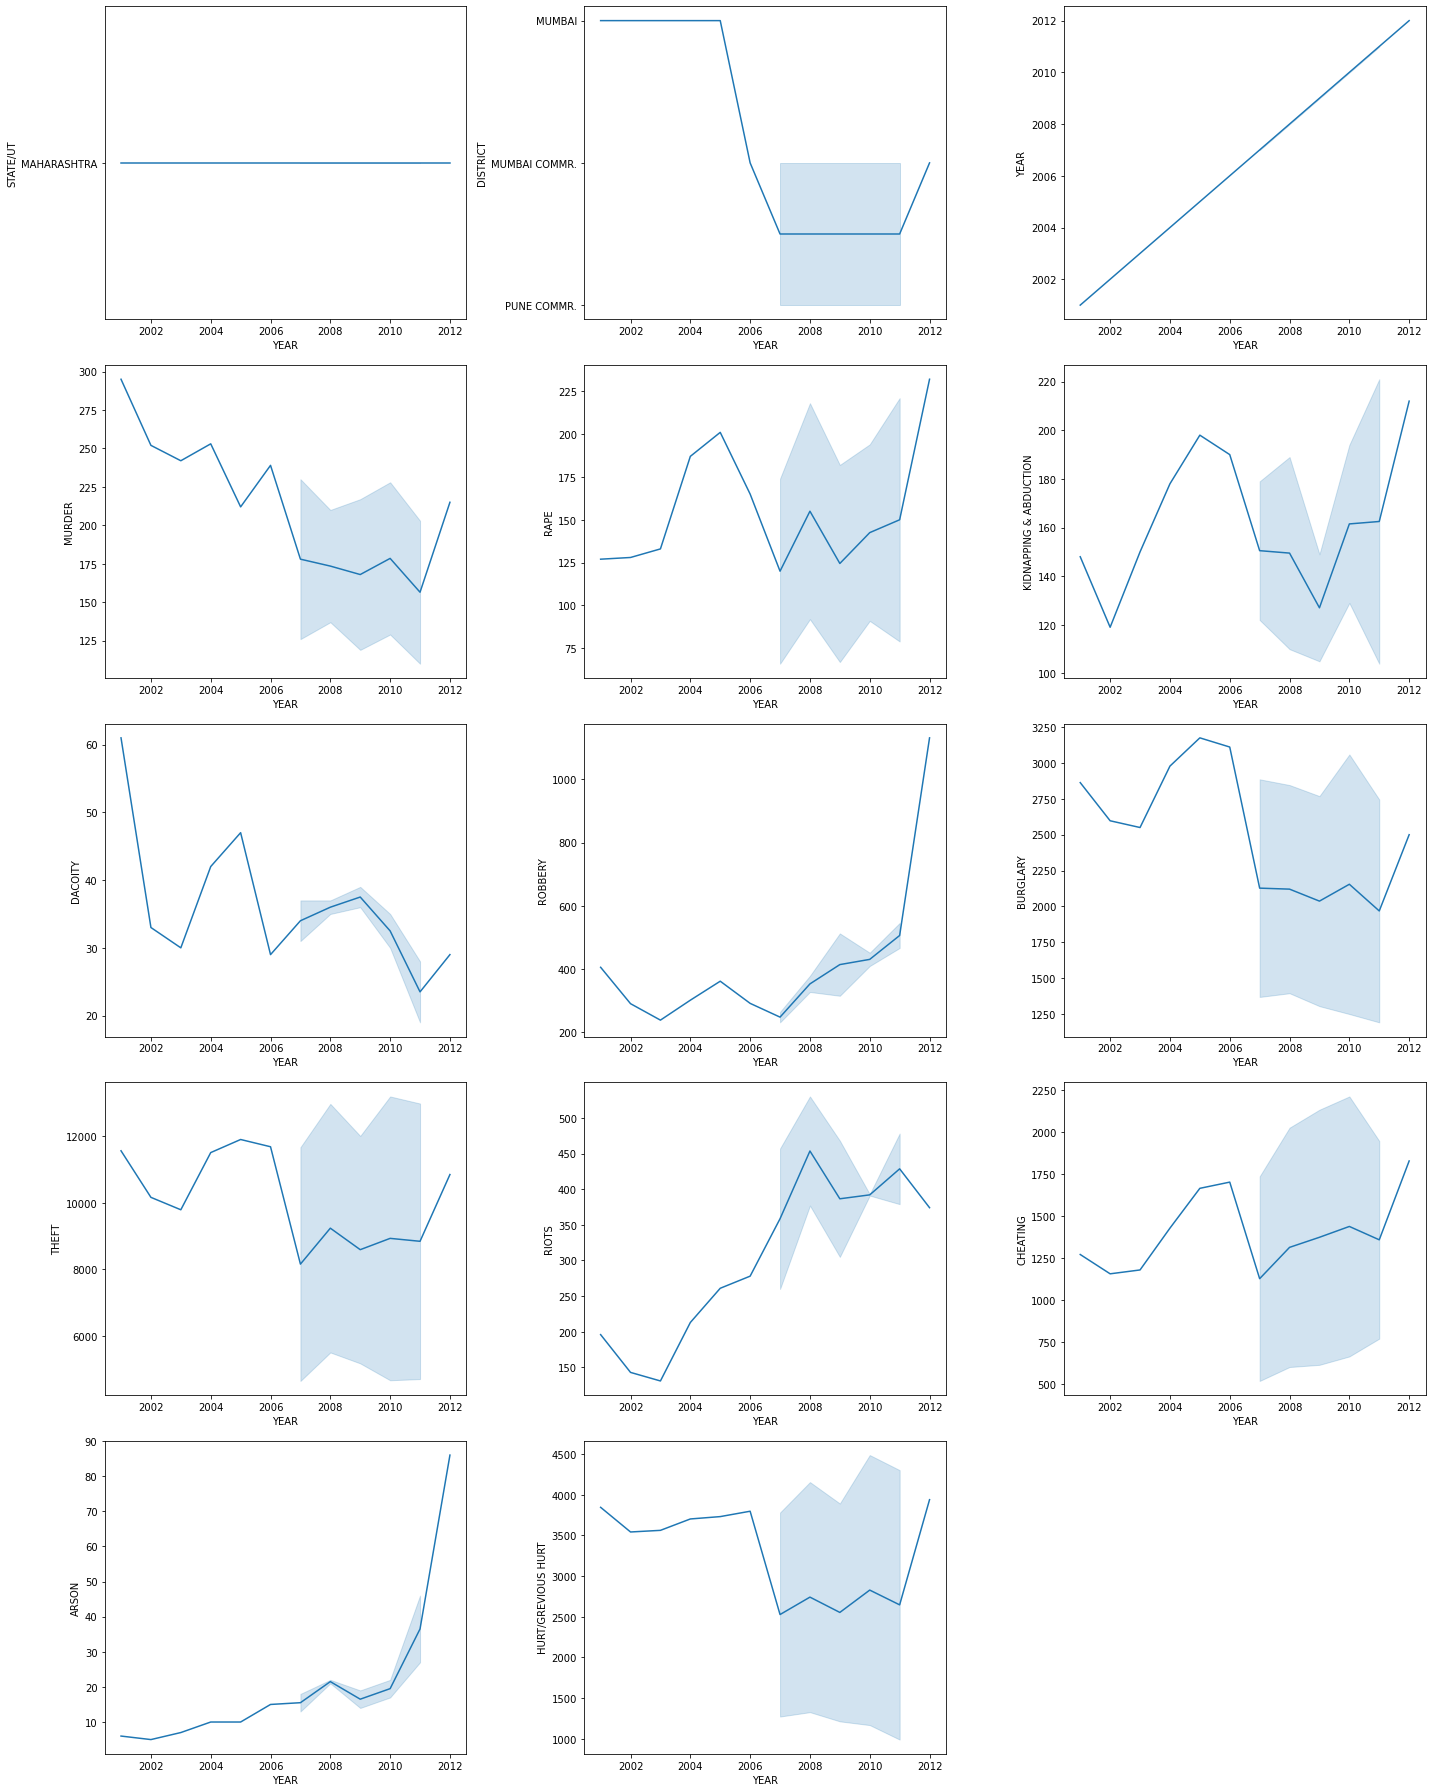

In [100]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_maharashtra:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.lineplot(x='YEAR',y=data_maharashtra[column],data=data_maharashtra)
    plotnumber+=1
plt.tight_layout()

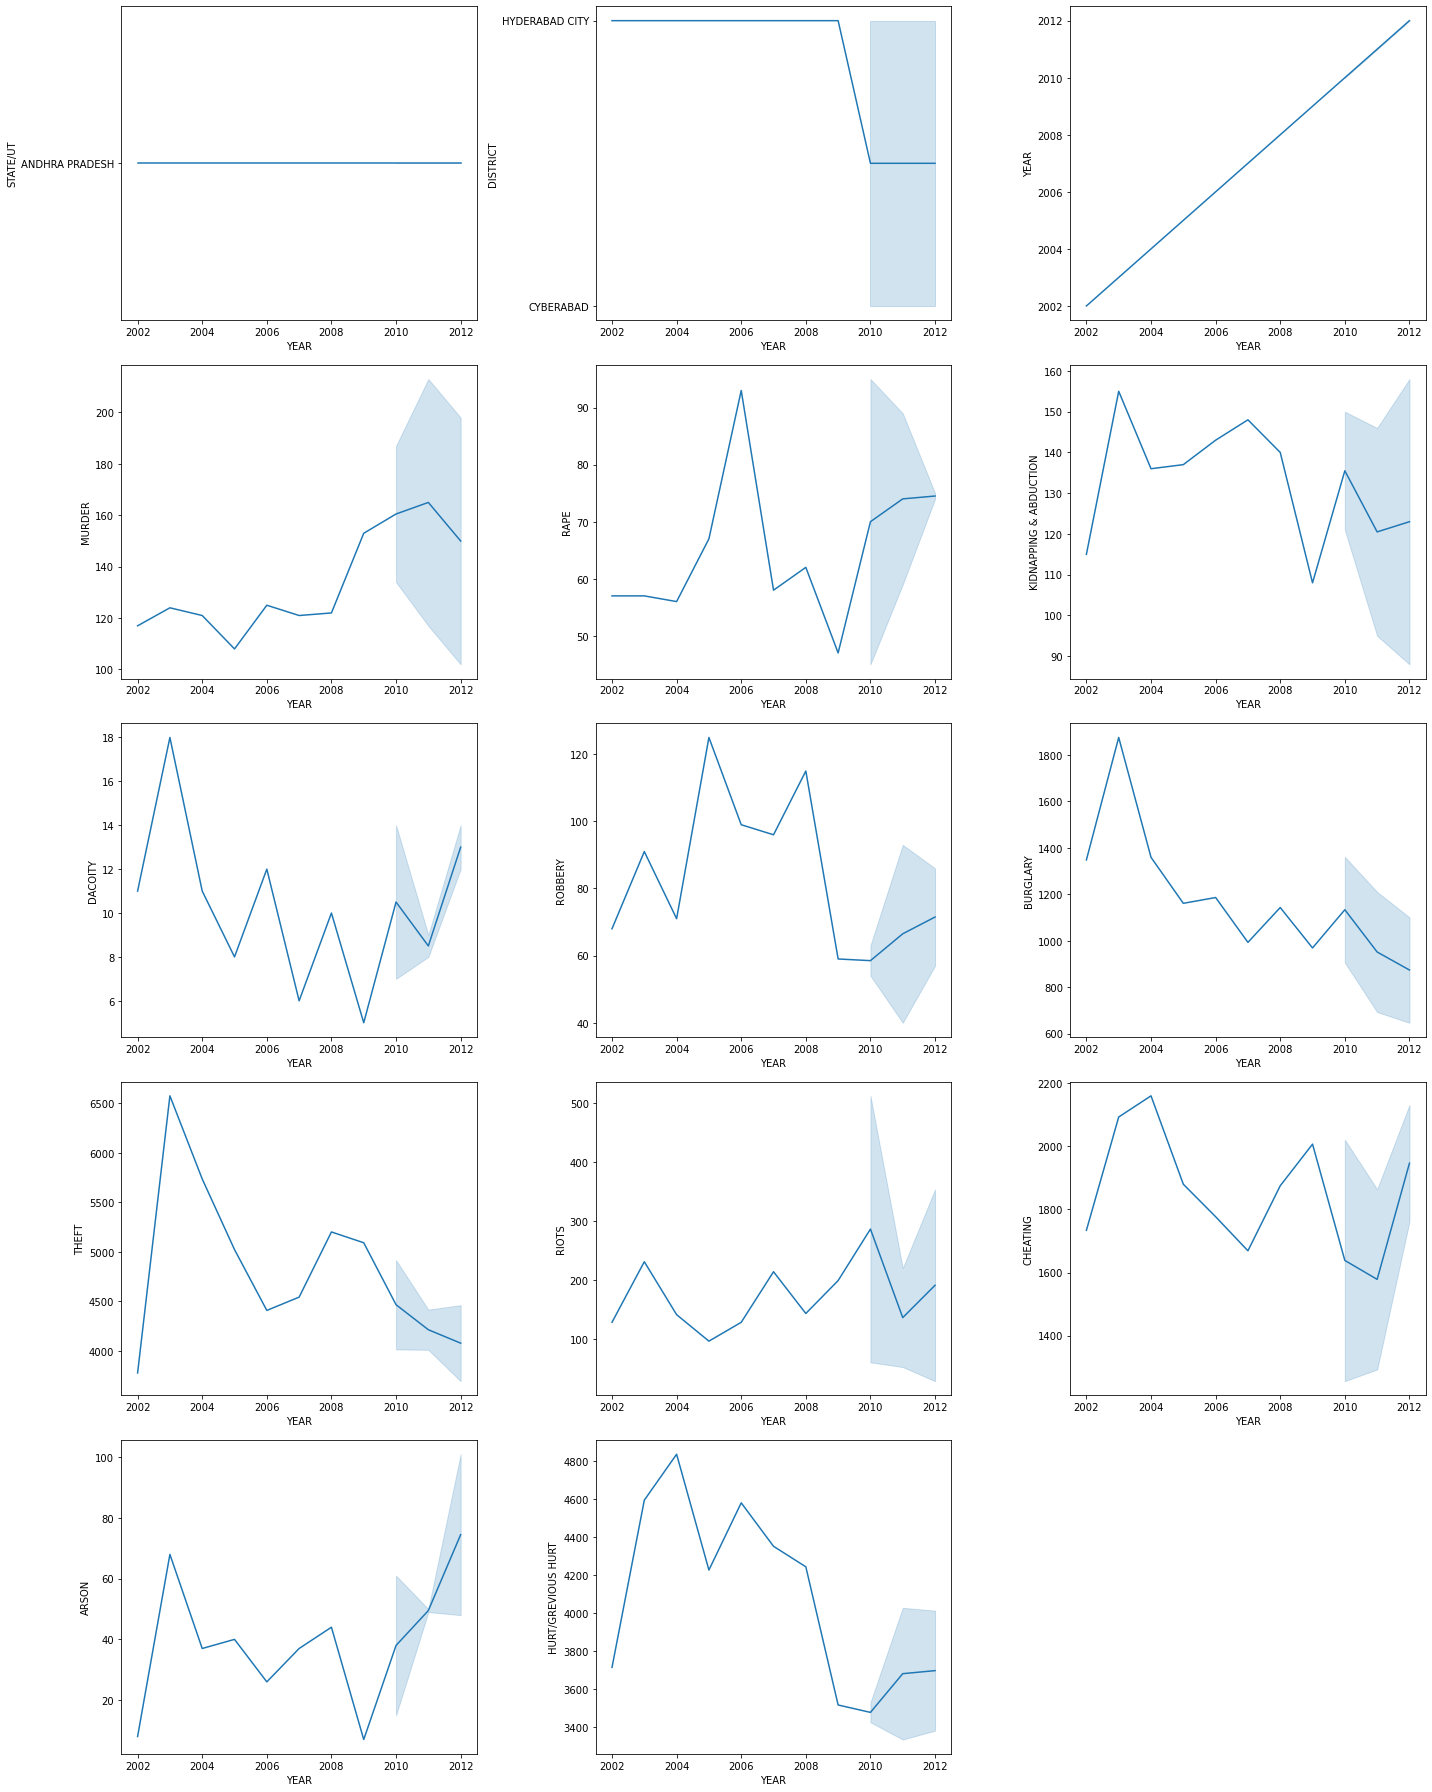

In [101]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_andhra:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.lineplot(x='YEAR',y=data_andhra[column],data=data_andhra)
    plotnumber+=1
plt.tight_layout()

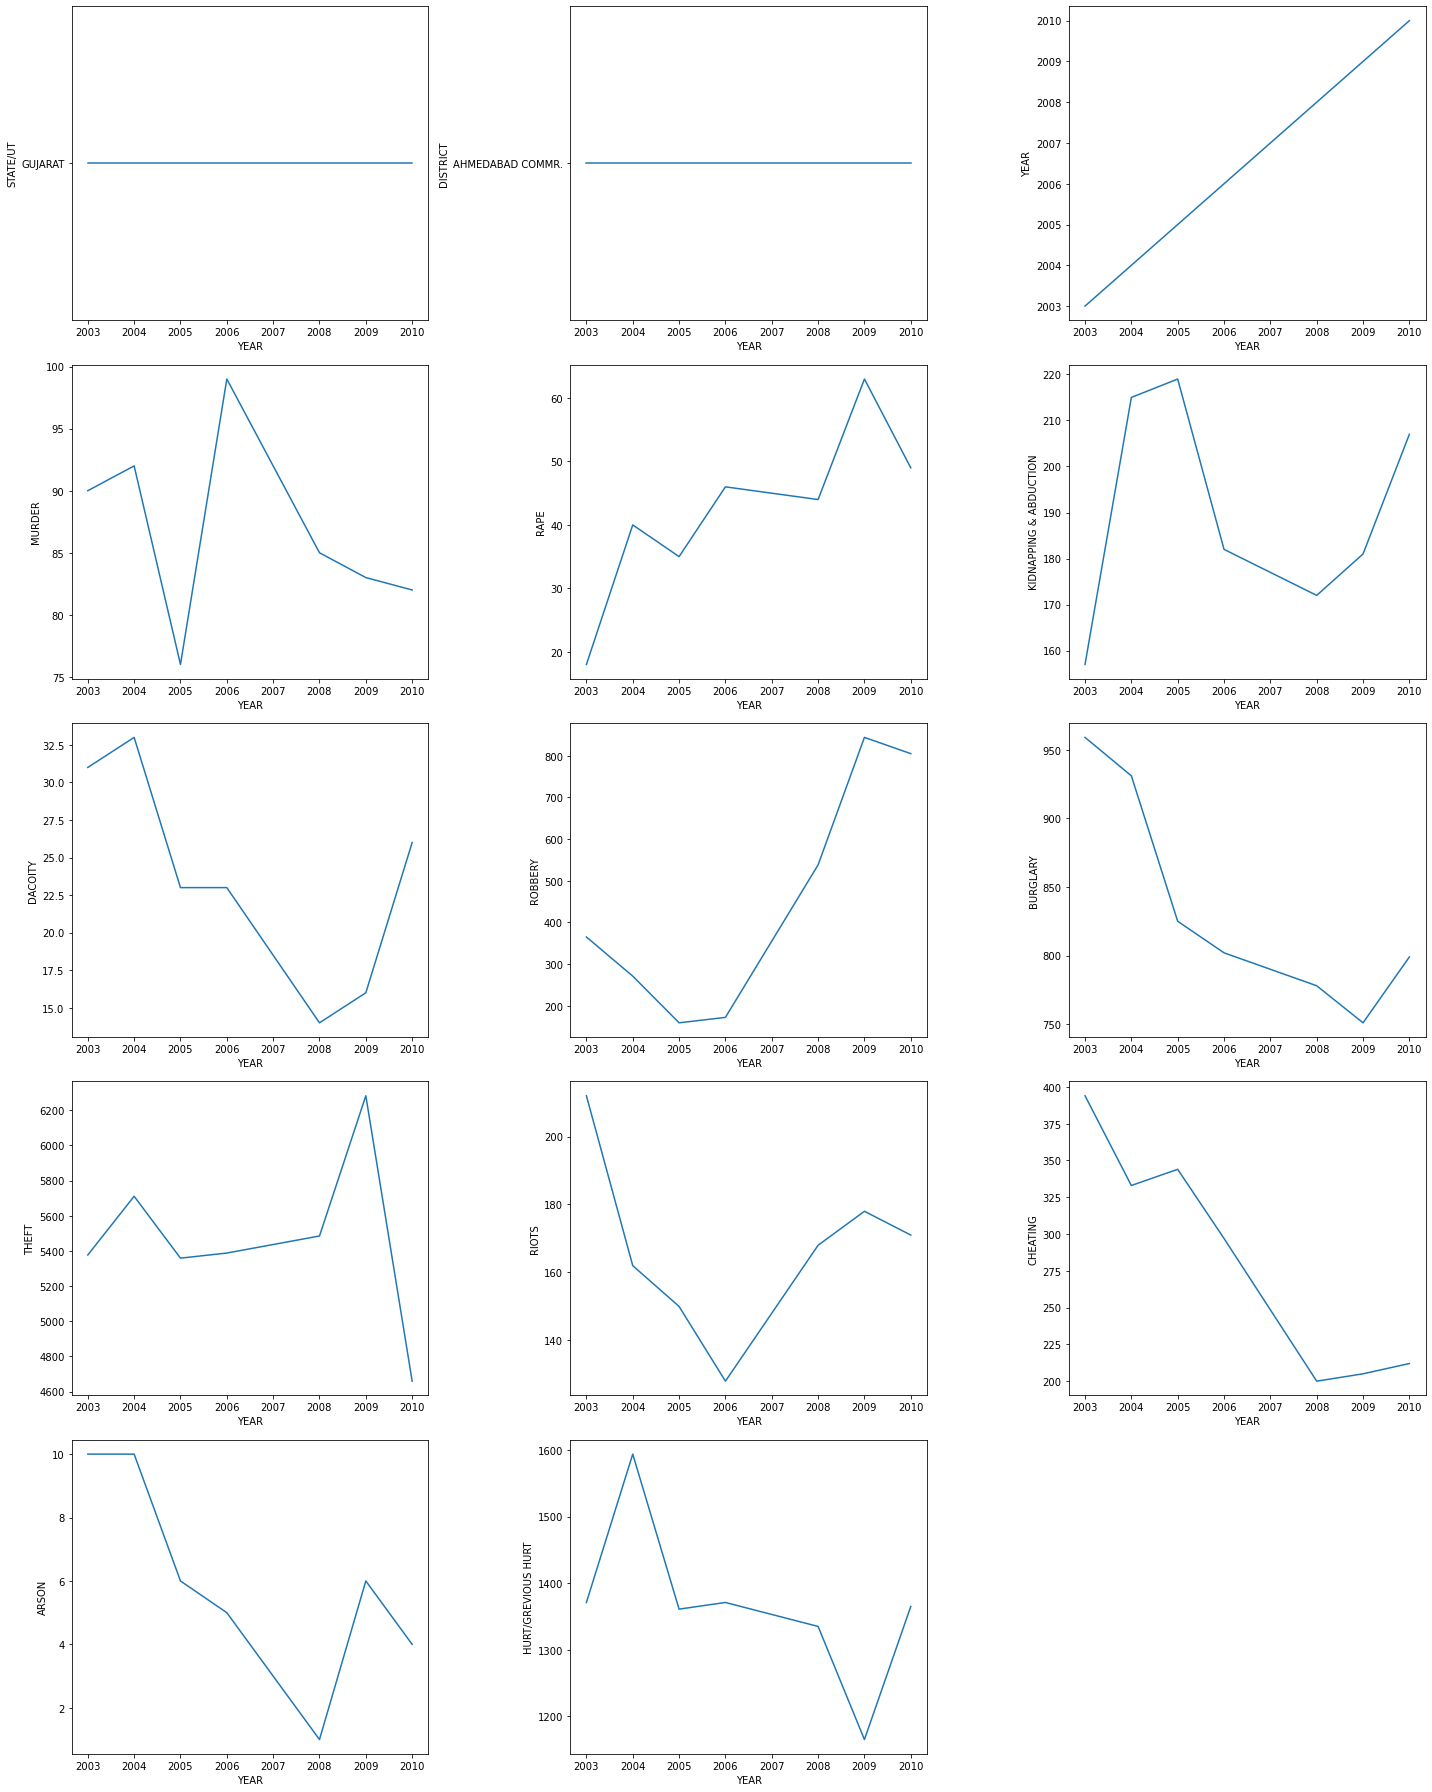

In [102]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_gujarat:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.lineplot(x='YEAR',y=data_gujarat[column],data=data_gujarat)
    plotnumber+=1
plt.tight_layout()

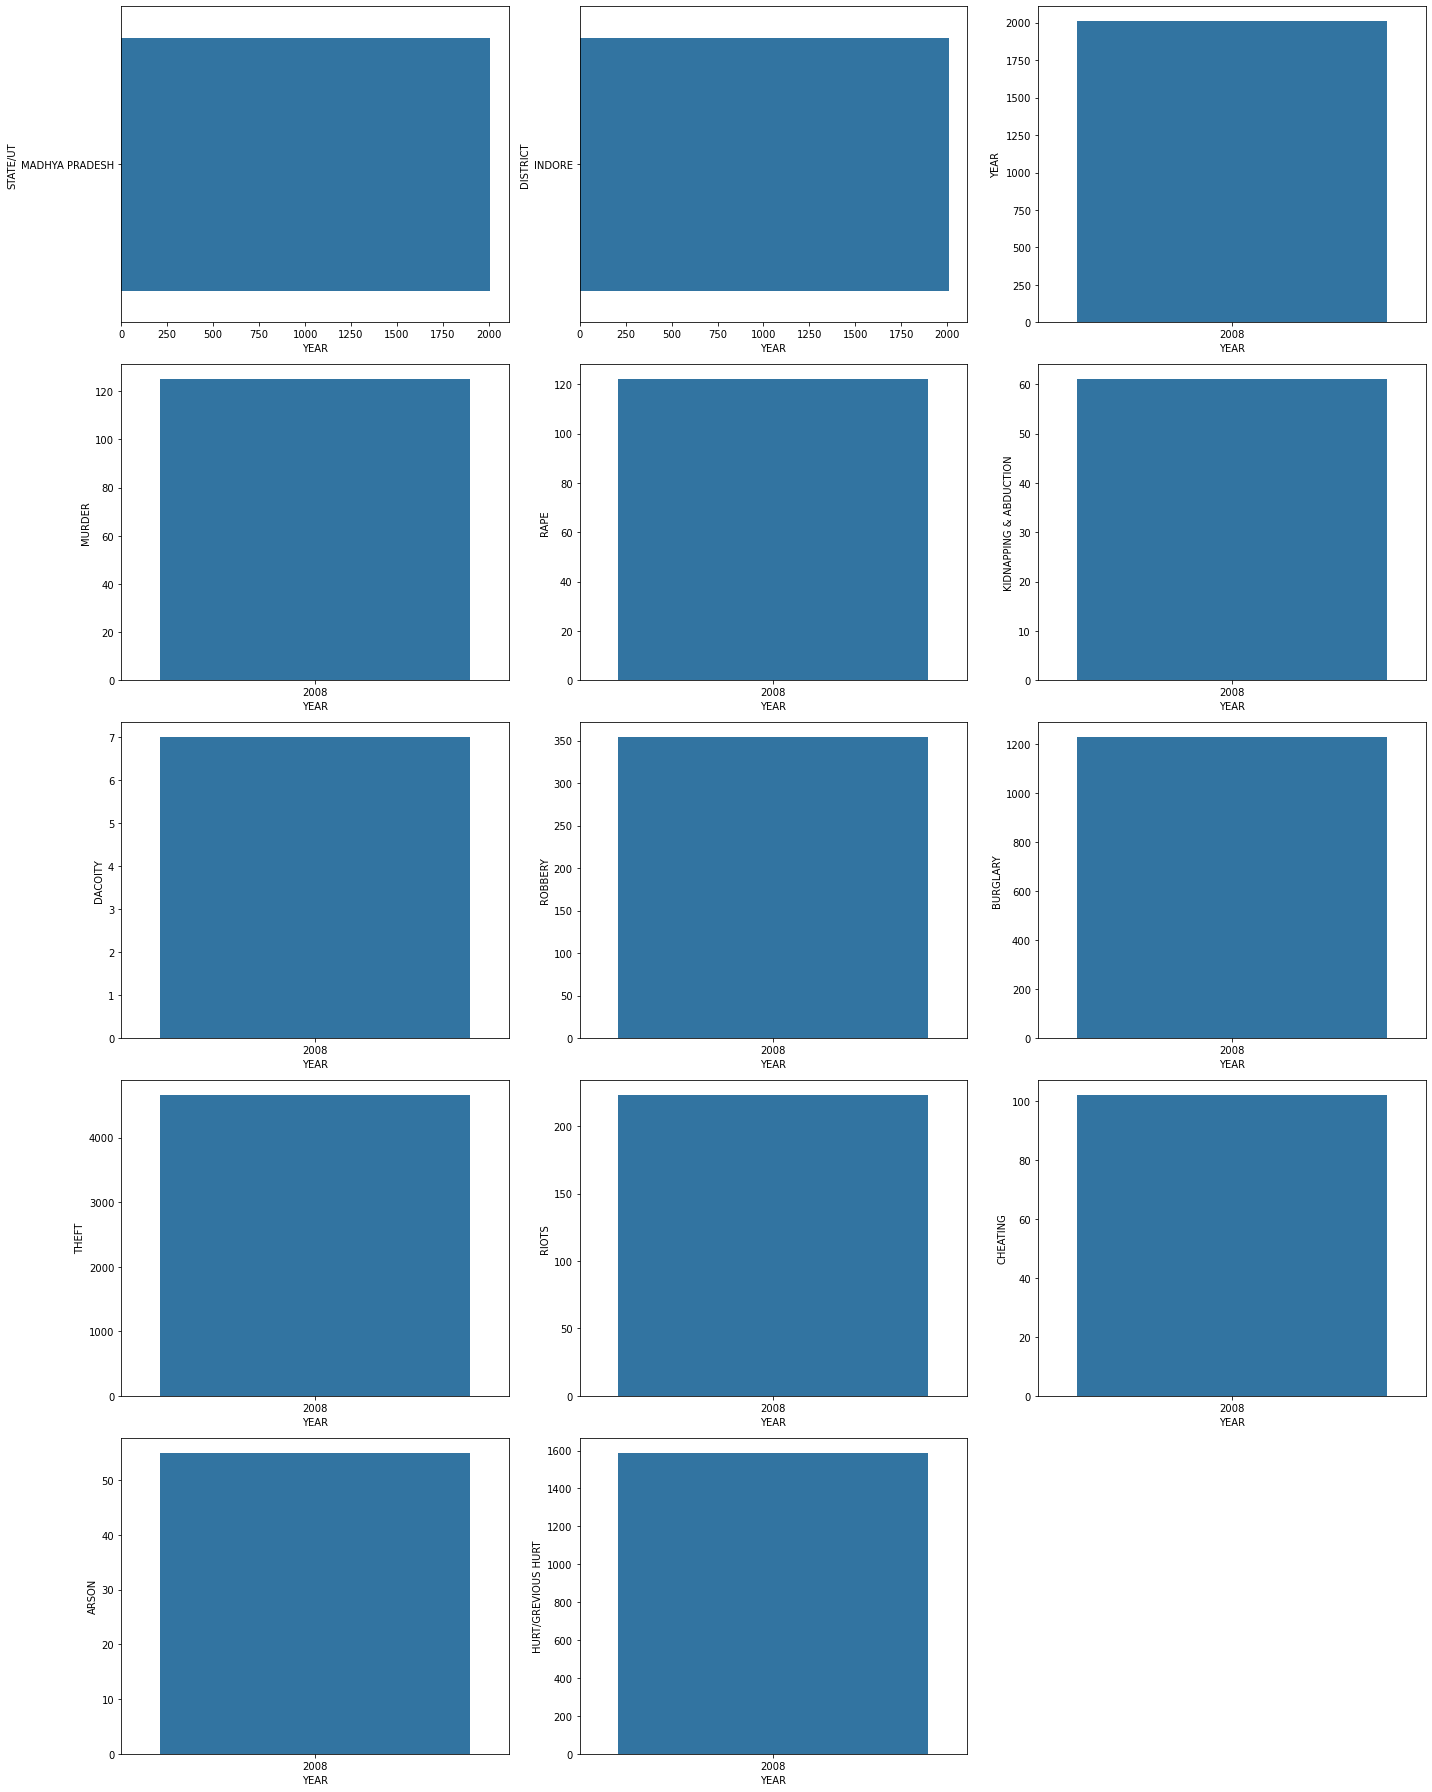

In [104]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_madhya_pradesh:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.barplot(x='YEAR',y=data_madhya_pradesh[column],data=data_madhya_pradesh)
    plotnumber+=1
plt.tight_layout()

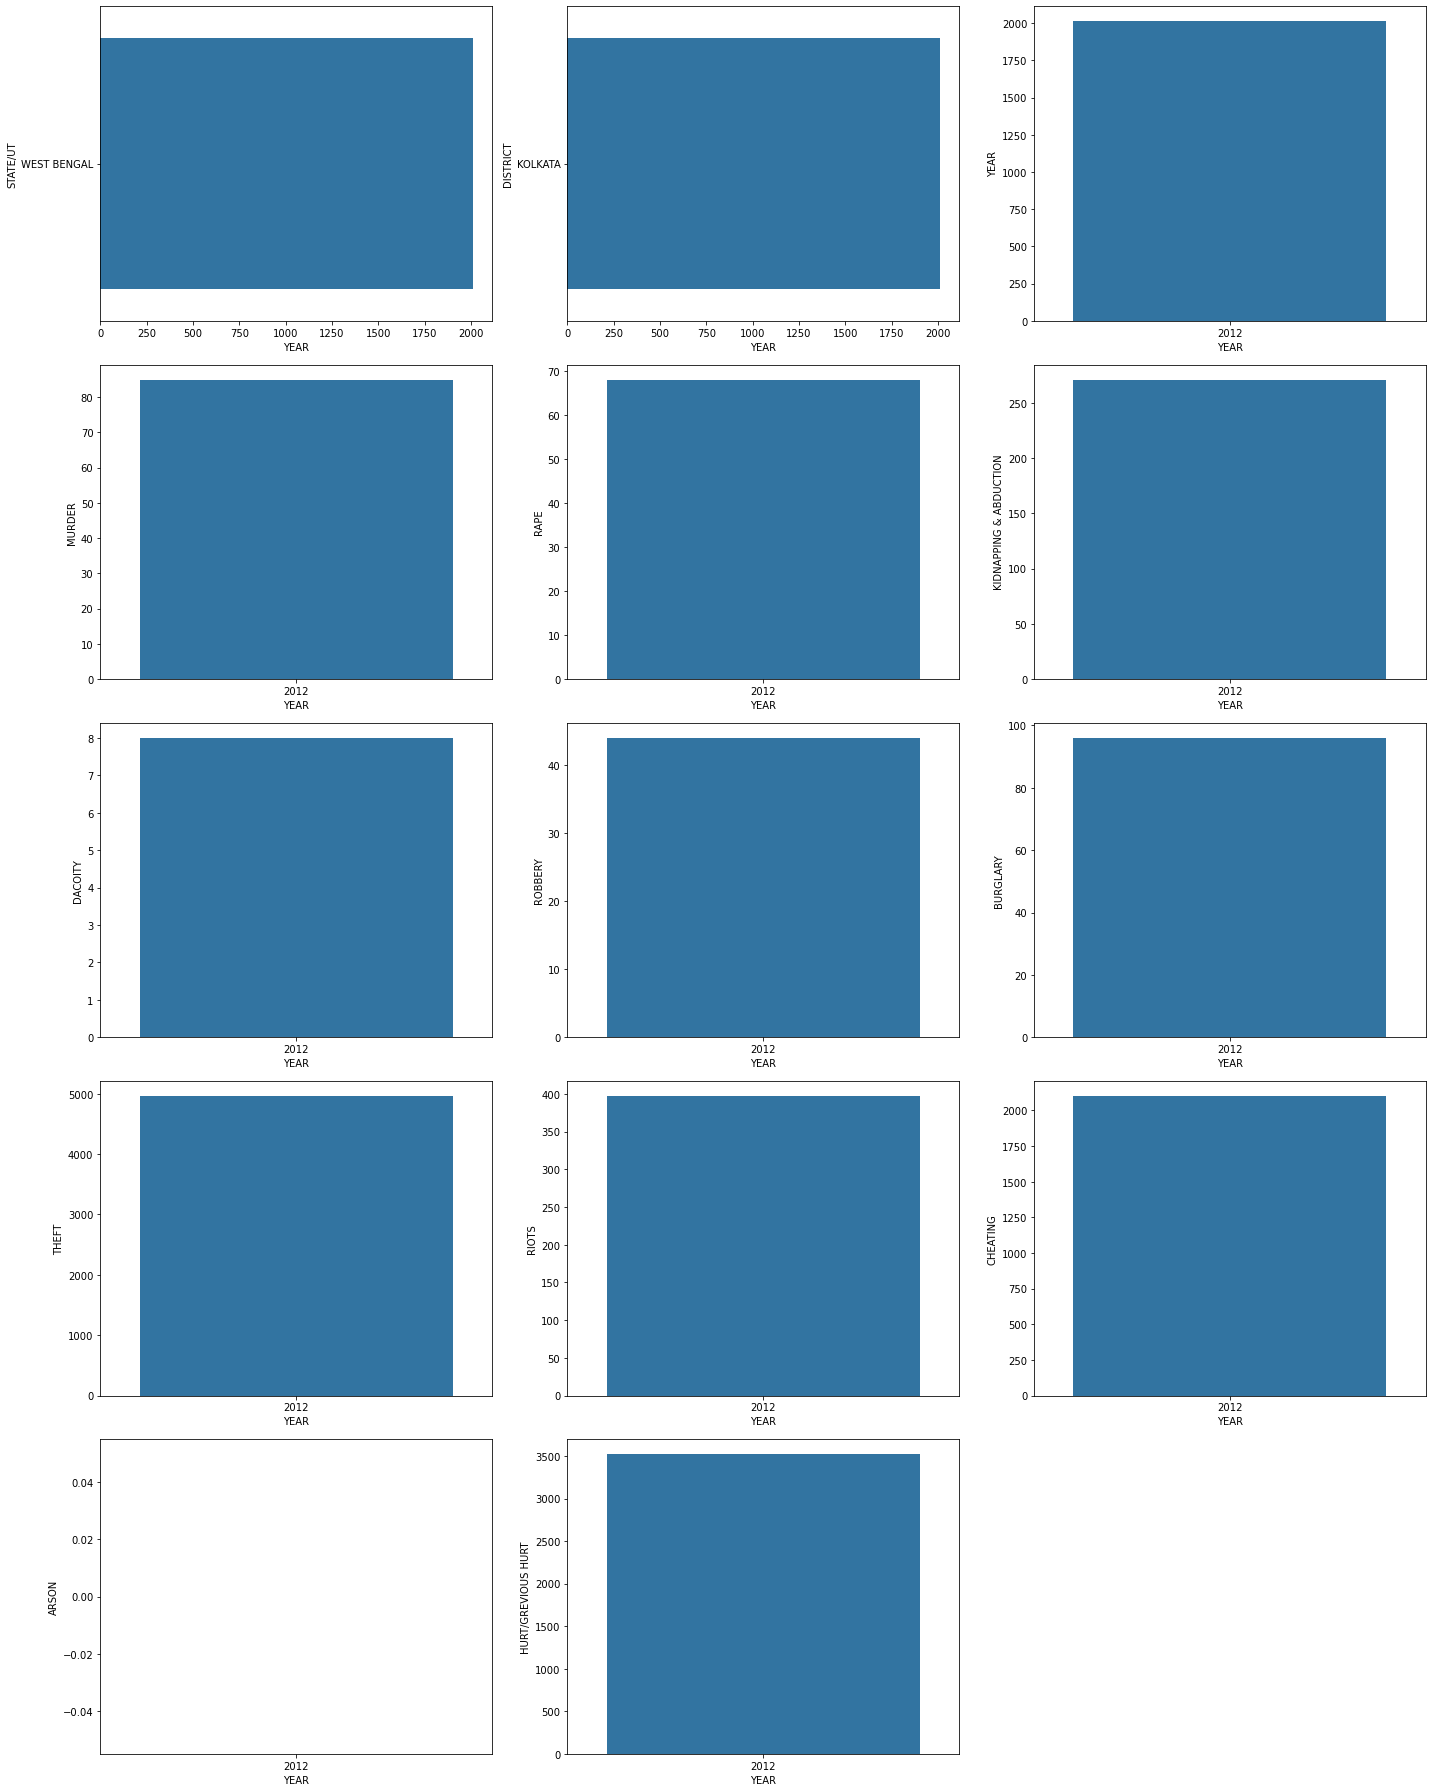

In [105]:
#plotting line plot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_west_bengal:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.barplot(x='YEAR',y=data_west_bengal[column],data=data_west_bengal)
    plotnumber+=1
plt.tight_layout()

In [69]:
#Adding column to peaceful area named as total crimes which gives the sum of all crimes 
peaceful_area['TOTAL_CRIMES']=peaceful_area['MURDER']+peaceful_area['RAPE']+peaceful_area['KIDNAPPING & ABDUCTION']+peaceful_area['DACOITY']+peaceful_area['ROBBERY']+peaceful_area['BURGLARY']+peaceful_area['THEFT']+peaceful_area['RIOTS']+peaceful_area['CHEATING']+peaceful_area['ARSON']+peaceful_area['HURT/GREVIOUS HURT']+peaceful_area['DOWRY DEATHS']+peaceful_area['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+peaceful_area['CRUELTY BY HUSBAND OR HIS RELATIVES']+peaceful_area['CAUSING DEATH BY NEGLIGENCE']
peaceful_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,1,4,98,173,164,37,23,795,17,126,57,233,1853
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,0,0,5,2,0,162,1,0,0,1,0,1,0,4,179
12,ANDHRA PRADESH,MAHABOOBNAGAR,2001,157,59,42,8,27,249,316,157,84,0,867,14,176,69,280,2505
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,10,2,296,1,4,0,17,1,0,0,6,343
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,8,12,1,4,118,231,70,53,34,679,6,38,108,167,1567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH-WEST,2012,47,87,399,0,47,211,1171,6,189,6,131,18,69,207,4,2592
8592,DELHI UT,STF,2012,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,3,7,10,0,3,3,0,1,1,0,28
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,0,3,21,81,17,15,1,186,0,2,1,44,384


In [72]:
#Checking for the least crimes states and district
least_crimes=peaceful_area.sort_values(by='TOTAL_CRIMES',ascending=True)
least_crimes[:10]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
6005,MANIPUR,CID,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7518,NAGALAND,KIPHIRE,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6525,HIMACHAL PRADESH,CID,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7272,HIMACHAL PRADESH,CID,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7873,ASSAM,BIEO,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1554,HIMACHAL PRADESH,G.R.P.,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675,DELHI UT,S.T.F.,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1358,DELHI UT,S.T.F.,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6770,NAGALAND,LONGLENG,2010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5275,MANIPUR,CID,2008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


**So we can see that State Manipur(District-Cid)in year 2009, Nagaland(District-kiphire)in year 2011, Himachal Pradesh(District-cid,g.r.p)in year 2010,2011 &2003, Assam(District-BIEO) in year 2012 and Delhi ut(District-s.t.f)in year 2001 & 2002 are the states and districts which are very safe to live.**

In [119]:
#Adding column to peaceful area named as total crimes which gives the sum of all crimes 
moderate_area['TOTAL_CRIMES']=moderate_area['MURDER']+moderate_area['RAPE']+moderate_area['KIDNAPPING & ABDUCTION']+moderate_area['DACOITY']+moderate_area['ROBBERY']+moderate_area['BURGLARY']+moderate_area['THEFT']+moderate_area['RIOTS']+moderate_area['CHEATING']+moderate_area['ARSON']+moderate_area['HURT/GREVIOUS HURT']+moderate_area['DOWRY DEATHS']+moderate_area['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+moderate_area['CRUELTY BY HUSBAND OR HIS RELATIVES']+moderate_area['CAUSING DEATH BY NEGLIGENCE']
moderate_area

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,9,41,198,199,78,104,30,1131,16,149,175,181,2508
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,8,16,191,366,168,65,69,1543,7,118,154,270,3202
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,4,14,237,723,156,209,38,2088,14,112,186,404,4372
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,4,25,437,1021,70,220,41,1244,12,109,247,431,4015
6,ANDHRA PRADESH,GUNTUR,2001,182,54,82,16,59,338,1122,244,300,43,1792,7,139,378,369,5125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,DELHI UT,NORTH-WEST,2012,60,64,357,6,65,166,1901,0,168,3,166,12,19,212,9,3208
8588,DELHI UT,OUTER,2012,96,67,572,6,91,262,2215,7,233,6,224,15,79,244,90,4207
8589,DELHI UT,SOUTH,2012,39,70,245,2,52,235,2126,3,256,4,101,17,59,68,25,3302
8590,DELHI UT,SOUTH-EAST,2012,46,116,538,2,72,201,2892,12,207,11,252,11,160,123,218,4861


In [120]:
#Checking for the intermediate crimes states and district
intermediate_crimes=moderate_area.sort_values(by='TOTAL_CRIMES',ascending=False)
intermediate_crimes[:10]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
492,RAJASTHAN,JAIPUR,2001,91,61,247,7,79,1110,3207,3181,1103,63,1528,29,179,453,749,12087
5593,ANDHRA PRADESH,CYBERABAD,2009,186,82,168,11,72,1348,3358,83,1174,71,3136,46,173,991,1063,11962
4159,ANDHRA PRADESH,CYBERABAD,2007,186,45,147,21,90,1165,2928,88,1192,74,3641,41,118,881,1188,11805
4867,ANDHRA PRADESH,CYBERABAD,2008,197,80,141,7,81,1319,3081,74,1183,42,3321,59,130,884,1166,11765
1174,RAJASTHAN,JAIPUR,2002,85,57,256,2,78,982,3000,2699,1423,65,1482,32,187,517,765,11630
3454,ANDHRA PRADESH,CYBERABAD,2006,193,60,166,13,86,1321,2339,49,1275,43,3871,50,132,837,1064,11499
2561,RAJASTHAN,JAIPUR,2004,83,81,227,10,63,939,4032,821,1581,35,1707,39,240,536,890,11284
3260,RAJASTHAN,JAIPUR,2005,88,82,211,3,49,821,4041,489,1844,47,1714,40,212,538,994,11173
7934,BIHAR,PATNA,2012,356,49,376,38,119,552,3114,522,748,12,4157,97,19,377,510,11046
7787,WEST BENGAL,MURSHIDABAD,2011,145,433,566,21,47,13,1109,252,189,45,4012,49,621,2956,290,10748


In [125]:
#Checking for the intermediate crimes states and district
intermediate_crimes=moderate_area.sort_values(by='TOTAL_CRIMES',ascending=True)
intermediate_crimes[:10]

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL_CRIMES
3125,MAHARASHTRA,MUMBAI RLY.,2005,5,2,7,0,29,5,1574,16,39,0,36,0,12,0,1,1726
1733,MAHARASHTRA,MUMBAI RLY.,2003,9,4,2,1,32,3,1589,9,36,0,28,1,16,0,0,1730
523,TAMIL NADU,KANYAKUMARI,2001,33,6,13,1,4,230,260,10,16,18,1125,5,27,29,0,1777
1039,MAHARASHTRA,MUMBAI RLY.,2002,3,2,7,1,22,4,1694,8,35,0,34,0,4,0,2,1816
3824,MAHARASHTRA,MUMBAI RLY.,2006,16,5,5,0,28,1,1678,9,22,0,35,0,17,0,0,1816
4531,MAHARASHTRA,MUMBAI RLY.,2007,4,1,1,3,39,3,1721,6,22,0,41,0,5,0,2,1848
5936,MADHYA PRADESH,NARSINGHPUR,2009,39,52,5,0,11,98,185,34,22,11,1127,26,101,42,98,1851
2828,BIHAR,AURANGABAD,2005,60,17,33,19,27,104,243,193,9,8,1091,29,0,9,18,1860
4235,BIHAR,BETTIAH,2007,61,23,17,12,15,40,208,202,18,9,1116,21,12,30,103,1887
357,MAHARASHTRA,MUMBAI RLY.,2001,12,2,1,0,29,3,1756,13,34,0,30,0,5,0,2,1887


# OBSERVATION

**Firstly to categorise the clusters I had to find out the mean of some columns such as Murder, rape, Burglary, Theft, Cheating and Hurt from each clusters.By looking at the mean of the each dataset clusters we were able to say that cluster_2 have highest mean, followed by cluster_0 and least was the cluster_1.So by looking at the mean we can say that cluster which mean is higher has the highest number of crimes and because of that its mean is coming highest among theree of the clusters.And the cluster which has least mean will have the lowest number of crimes.And in between will fall the cluster which mean is not low or high.So by this we were able to say that cluster__2 belonged to sensitive area as it has the highest mean among the three clusters.For cluster_0 we were able to say that it belongs to moderate area as its mean falls in between cluster_2  and cluster_1.And for cluster_1 we were able to say that it belongs to Peaceful area as it has the least mean compared to the other clusters mean.And after plotting the line plot we were able to verify that above things are true.**

**After doing analysis i can say that may be increasing population may effect the highest crime rates in senstive area.Cause each and every year crime rate is going on increasing with increase in population.May be increase in alcohol consumption,increase in drugs consumption also may impact the crime rates.And also poverty can effect the increase in crimes**

**To prevent the crimes, there should be strict laws passed against the defaulter or whoever is doing crimes. The rapist should be brought in public and stone pelted against him till he dies or the privates parts should be cut or ripped off from the body. Murderers should be hang or encountered. There should be strict actions taken on the other crimes defaulters. In all places cameras should be installed. Patroling should be done each and every day.So there should be a fear in mind of the people before doing any crimes. And if that fear increases than only we can see a lower crima rate.Cause before commiting they should think about it more than 10 times about its consquences.**

**In senstive area most of the murders took place in state Maharashtra(district-Mumabi) in year 2001, also the most of the rapes took place in maharshatra(district-Mumbai commr)in year 2012 and most of the kidnapping and abduction took place in Karnataka(district-Bangalore commr) in year 2011.**

**By analysis we came to know that most number of crimes took place in  State Maharashtra in district Mumbai Commr & Mumbai and in the year 2010,2011,2008,2009 and 2005.But when i did a state wise analysis we came to know the same district that is Bangalore Commr is repeating for almost every year from karnataka that is it have been repeated for almost 12 times in senstive area data.Than three districts from maharashtra falls under sensitive area, that is Mumbai commr,mumbai and pune commr.Among this Mumbai Commr district is most repaeating one among rest two. After that two district from Andhra Pradesh falls under senstive area that is Hyderabad city and Cyberabad.And it can be seen that Hyderabad city district is most repeating amongst the two.And lastly we saw that Ahmedabad Commr district from Gujarat falls under sensitive area and it most repeating one. So by this we can say that district Mumbai Commr,Bnagalore Commr,Hyderabad City and Ahmedabad are the most unsafe districts.**

**By doing analysis we came to know that State Manipur(District-Cid)in year 2009, Nagaland(District-kiphire)in year 2011, Himachal Pradesh(District-cid,g.r.p)in year 2010,2011 &2003, Assam(District-BIEO) in year 2012 and Delhi ut(District-s.t.f)in year 2001 & 2002 are the states and districts which are very safe.**

# 4.4   Capstone project overall story in your own words. Min 1000 words.


**The capstone project on crimes in India is an attempt to examine the issue of crime in India comprehensively. The project aims to explore the various types of crimes in India, the reasons behind the crime, the impact of crime on society, and measures to prevent it.Crime is a widely spread social problem that affects individuals and communities in various ways. India, as a country, has been facing various forms of crimes ranging from minor crimes to major crimes. Understanding the dynamics of crimes in India is a complex and multifaceted issue, as there are multiple factors that contribute to the perpetration of crime. Therefore, this capstone project aims to explore the different types of crimes in India, their causes and consequences.
The project will provide a comprehensive overview of the crime scenario in India, including the trends and patterns of crime over the years. It will give us the good information about the minor as well major crimes that have been happening across India over the years.**

**As we all know that we were given 4 phases to complete that project in which phase 1 is to collect the data of each state population, area and literacy rate.Phase 2 is to do the analysis.Phase 3 is to do SQL operations and Phase 4 is about non supervise machine learning(clustering) and we were provided with several datasets about crimes in  India.**

**So first when i started with the phase 1 of collecting the data, lot of challenges and difficulties came in front of me as the census is performed after every 10 years so that data which is available of population,area and literacy rate was only of year 2001 and 2011.And the datasets which were provided to us was having the data of crimes of each state with districts of years 2001 to 2012. So tried in each and every possible way to get the data and also it is very difficult to manipulate the data for so many years. So unfortunately i was able to collect the data of years 2001 and 2011 only. I have used selenium to scrap the data.After scrapping the data i saved it in excel format. After that i modified the data as per to the datasets which were provided to us so that it could merge with it at the time of analysis.**

**So moving on to phase 2, we were asked to do the analysis on different criteria such as literacy rate vs total crimes, types of crimes vs each state vs literacy rate, year on year total crime rate, area vs overall crime and population vs overall crime.**

**So when they told us to do analysis on literacy rate vs total crimes, I took the of each state of year 2001 and 2011 of dataset  ipc crimes,crimes against women's,SC,ST and children's.I have mentioned how I merge data and all while doing this analysis.So while doing  so with the help of visualization it came to know that in most of the states as the literacy rate increasing the crimes are also increasing. This means that people are getting educated but the crimes are not stopping or decreasing instead of it is increasing.After that we did the analysis of each state vs type of crimes vs literacy rate, to this i took the data from datasets ipc,women s, SC,ST and children's so that I will come to know about the overall crimes as well the crimes against women's,SC,ST and children's..Once it was done I moved on to the analysis of year on year crime rate. So I was able to carry out the year on year crime rate change and while doing so we noticed the crime rate change across all states  fluctuates over the years as it goes up and down over the years. After that analysis of overall crime vs area was performed in that we found that area in 2001 and 2011 remained same for each state but the overall crimes went on increasing except some few states. Than last not the least analysis of population vs overall crimes were done from which it came into light that population of each state is increasing very rapidly and  the crimes are also increasing with increase in population.**

**So after completing this two phases we got some observations about the each state.
In ANDHRA PRADESH Highest number of crimes which was reported was Cruelty by husband or his relatives on women in year 2011.Most number of crimes reported against st was hurt,against children's was rape and against women's was assault on women to outrage her modesty.**

**In ARUNACHAL PRADESH Highest number of crimes which was reported was kidnapping and abduction in 2011.There was No crimes reported against SC.Most number of crimes reported against st was hurt , against children's was rape and against women's was kidnapping and abduction.**

**In ASSAM Highest number of crimes which was reported was theft in year 2011.In 2001, most numbers of crime reported against SC was hurt, but in 2011 there was not a single crime reported against them.No crime reported against st.Most number of crimes reported against children's was procuration of minor girl and against womens was kidnapping and abduction.**

**In BIHAR Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc was hurt against st was hurt,against childrens was procuration of minor girls and against womens was kidnapping and abduction.**

**In CHATTISGARH Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc was hurt,against st was hurt,reported against childrens was rape and against womens was assault on women to outrage her modesty.
In GOA Highest number of crimes which was reported was theft in year 2011.No crime reported against sc and st.Most number of crimes reported against childrens was rape and against womens was assault on women to outrage her modesty.**

**In GUJARAT Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc was hurt,against st was hurt,against childrens was rape and against womens was cruelty by husband or his relatives.**

**In HARYANA Highest number of crimes which was reported was theft in year 2011 Most number of crimes reported against sc was rape,against childrens was rape and and against womens was cruelty by husband or his relatives.No crime reported against st.**

**In HIMACHAL PRADESH Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc was rape,against childrens was kidnapping and abduction and against womens was assault on women to outrage her modesty.No crime reported against st.**

**In JAMMU & KASHMIR Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc was hurt,against childrens was rape and against womens was assault on women to outrage her modesty.No crime reported against st.**

**In JHARKHAND  Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against st and sc was hurt,against childrens was kidnapping and abduction and against womens was rape.**

**In KARNATAKA Highest number of crimes which was reported was theft in year 2011.Most number of crimes reported against sc and st was hurt,against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In KERALA Highest number of crimes which was reported was Cruelty by husband or his relatives on women in year 2011.Most number of crimes reported against sc was hurt,against st was rape,against childrens was rape and against womens was cruelty by husband or his relatives.**

**In MADHYA PRADESH Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt, against st was rape, against childrens was rape and against womens was assault on women to outrage her modesty.** 

**In MAHARASHTRA Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was rape, against st was rape reported against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In MANIPUR Highest number of crimes which was reported was theft in year 2011. There was no crime reported against sc and st Most number of crimes reported against childrens was kidnapping and abduction, and against womens was kidnapping and abduction.** 

**In MEGHALAYA Highest number of crimes which was reported was theft in year 2011. There was no crime reported against sc and st. Most number of crimes reported against childrens was rape and against womens was rape.** 

**In MIZORAM Highest number of crimes which was reported was theft in year 2001 but now it have been decreased in year 2011 There was no crime reported against sc. Most number of crimes reported against st was hurt, against childrens was rape and against womens was rape.**

**In NAGALAND Highest number of crimes which was reported was theft in year 2011. There was no crime reported against sc. Most number of crimes reported against st was hurt, against childrens was rape and against womens was rape. from 2001 to 2011 population decreased and also there was an decrease in the overall crimes.**

**In ODISHA Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt, against st was hurt in 2001 and rape in 2011, against childrens was rape and against womens was assault on women to outrage her modesty.** 

**In PUNJAB Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt, against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives. No crime reported against st.** 

**In RAJASTHAN Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc and st was hurt, against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In SIKKIM Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was rape and hurt, against st was hurt in 2011 and murder in 2001, against childrens was rape and against womens was rape.**

**In TAMIL NADU Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc and st was hurt, against childrens was rape and against womens was kidnapping and abduction.**

**In TRIPURA Highest number of crimes which was reported was Cruelty by husband or his relatives on women in year 2011. Most number of crimes reported against sc was hurt, against st was rape, against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In UTTAR PRADESH Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was rape in 20011 and hurt in 2001, against st was murder and against childrens and womens was kidnapping and abduction.** 

**In UTTARAKHAND Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt in 2011 and murder in 2011, against st was hurt, rape and murder in 2001 and no crimes reported in 2011, against childrens was kidnapping and abduction and against womens was kidnapping and abduction.** 

**In WEST BENGAL  Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt, against st was rape, against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In A & N ISLANDS Highest number of crimes which was reported was theft in year 2011. No crime reported against sc. Most number of crimes reported against st was rape that is 1 in 2011 and no crime was reported in 2001, against childrens was kidnapping and abduction and against womens was rape.** 

**In CHANDIGARH Highest number of crimes which was reported was theft in year 2011. Most number of crimes reported against sc was hurt, against childrens and womens was kidnapping and abduction. No crime reported against st.** 

**In D & N HAVELI Highest number of crimes which was reported was theft in year 2011. No crime reported against sc,one rape in 2011 was reported against st and against childrens and womens was kidnapping and abduction.**

**In DAMAN & DIU Highest number of crimes which was reported was theft in year 2011. No crime reported against sc and st. Most number of crimes reported against childrens was kidnapping and abduction and against womens was cruelty by husband or his relatives.** 

**In DELHI UT Highest number of crimes which was reported was theft in year 2011. No crime reported against sc and st. Most number of crimes reported against childrens and womens was kidnapping and abduction.**

**In LAKSHADWEEP Highest number of crimes which was reported was theft in year 2001. No crime reported against sc,st and womens. Most number of crimes reported against childrens was murder that was in 2001 and in 2011 no crimes were reported.**

**In PUDUCHERRY Highest number of crimes which was reported was theft in year 2011. No crime reported against sc and st. Most number of crimes reported against childrens was kidnapping and abduction and against womens was assault on women to outrage her modesty.**

**After completing phase 2 we were told to do SQL operations on datasets which were provided to us in phase 3. So in that we were told to insert the records from dataset into table than-using SQL query we were told find out  highest number of particular crimes that happened in state,district and year. So there were about 12 operations we did in phase three and and at last we were told to save the data of one operation into a data frame  and after that we had to analyze the  districts that appeared 3 times or more than that and we have to do this by showing graph.**

**After the completion of phase 3, we were told  to perform unsupervised machine learning(clustering)using dataset which were provided to us. But for doing so we had to take the important data only so that we could make good clusters.So in that we were told to do three clusters such as Sensitive area, moderate area and peaceful area. So I made a new excel file added that data whichever I felt as important and than uploaded it. And than with the help of k-means method I made three clusters. But the challenge was to identify which cluster was sensitive,peaceful and moderate. So before that separated the data of each cluster and named them as cluster_0, cluster_1 and cluster_3. Than i run some codes and found out the mean of several crimes from each cluster. And also plotted some plots to verify the clusters. After analysis I came to know that cluster_2 belongs to sensitive area, cluster_1 belongs to peaceful area and cluster_0 belongs to moderate area. Than saved the data as data frame named them as per to area. And were told to write down the observations.**

**So By analysis we came to know that most number of crimes took place in  State Maharashtra in district Mumbai Commr & Mumbai and in the year 2010,2011,2008,2009 and 2005.But when i did a state wise analysis we came to know the same district that is Bangalore Commr is repeating for almost every year from karnataka that is it have been repeated for almost 12 times in senstive area data.Than three districts from maharashtra falls under sensitive area, that is Mumbai commr,mumbai and pune commr.Among this Mumbai Commr district is most repaeating one among rest two. After that two district from Andhra Pradesh falls under senstive area that is Hyderabad city and Cyberabad.And it can be seen that Hyderabad city district is most repeating amongst the two.And lastly we saw that Ahmedabad Commr district from Gujarat falls under sensitive area and it most repeating one. So by this we can say that district Mumbai Commr,Bnagalore Commr,Hyderabad City and Ahmedabad are the most unsafe districts.**

**So after going through all this phases I can say that our states literacy rate is increasing but crime are decreasing this means that people are getting educated but crimes are not stopping.On the other side, Population of each state is increasing with the increase in crimes. So somewhere I think that this population should be controlled otherwise poverty rate will increase and people will do crimes for food. And there will be no end for this.The year on year crime rate change is moving fluctuating over the years.So  by doing this project we came to know about the most unsafe and safe districts, which states  and districts falls under sensitive, moderate and peaceful area. In which states and districts most number of murders, rapes and kidnapping and abduction happened. Crimes against SC, ST, Childrens and womens over the states. So by doing analysis were able to get the information about the same.So that we can tackle the problems which each state facing in the future like we can move the police force from peaceful area places or districts to sensitive area districs.So this project analysis will be very much usefull**
